**Introduction:**

Within the framework of hospital systems, patient care can be broadly categorized into two main streams: inpatient and outpatient care. Each stream caters to distinct medical needs and treatment modalities, shaping the approach to healthcare delivery.

Inpatient care encapsulates individuals who require extended stays within a hospital setting, often undergoing intricate procedures or facing severe health conditions that demand continuous monitoring and treatment. Complex surgeries, critical illnesses, childbirth, and severe injuries constitute scenarios where patients fall under the umbrella of inpatient care. Conversely, outpatient care represents services that do not necessitate hospitalization, enabling patients to receive required treatments or procedures externally without a prolonged hospital stay.

One of the pivotal tasks for physicians lies in determining the observation status of a patient, evaluating the necessity of hospitalization. This assessment period typically spans no more than 24 hours and significantly influences subsequent care decisions. Outpatient care encompasses a spectrum of services ranging from diagnostic procedures like X-rays, MRIs, CT-scans, and lab tests to routine physical exams and radiation treatments.

A notable divergence between inpatient and outpatient care surfaces in their financial implications. Inpatient care often incurs additional facility-based fees, whereas outpatient care primarily involves fees associated with doctors and conducted tests. The cost disparities within healthcare services, as reflected in the Healthcare Cost and Utilization Project data from the Agency for Healthcare Research and Quality, elucidate the variance in average inpatient charges contingent upon treatment duration and complexity. However, the precise financial impact is subject to the terms outlined by insurance providers.

Understanding the nuances between these care models not only aids in providing optimal treatment but also elucidates the financial landscape of healthcare services, contributing to informed decision-making for both patients and healthcare providers.



**Data Source**

The foundation of this project's analysis lies in data collected from the Medicare Inpatient Hospitals by Geography and Service for the year 2021. The dataset comprises essential categories for both inpatient and outpatient care, offering a detailed perspective on healthcare services and their financial implications.

Inpatient Data Insights

The inpatient dataset includes the following key columns:

1. DRG Definition (Diagnosis-Related Group): This categorization system aids in classifying patients with similar clinical diagnoses, essential for cost control and determining reimbursement rates.
2. Provider ID: Unique identification for the healthcare provider.
3. Provider Name, Street Address, City, State, Zip-Code: Details of the hospital providing inpatient care.
4. Hospital Referral Region: Geographic region referring patients to specific hospitals.
5. Total Discharges: Indicates the count of beneficiaries released from inpatient care.
6. Average Covered Charges: The billed amount to Medicare for services provided.
7. Average Total Payment: Payment received by the provider, including Medicare payments, beneficiary co-payments, deductibles, and third-party payments.
8. Average Medicare Payments: Specifically refers to the payments made by Medicare.
The analysis of inpatient data unveils patterns in service provision, cost dynamics, and Medicare reimbursement rates, offering insights into the financial landscape of inpatient care services.

Outpatient Data Insights

Conversely, the outpatient dataset comprises the following columns:

1. Provider ID, Name, Street Address, City, State, Zip-Code: Identifiers and location details of outpatient care providers.
2. Hospital Referral Region: Geographic reference region for outpatient services.
3. Outpatient Services: Indicates the quantity of services provided to outpatients.
4. Average Estimated Submitted Charges: The billed amount to Medicare for services rendered to outpatients.
5. Average Total Payments: The aggregated payments received by providers for outpatient services.

The goal of this project is to conduct an analysis of both inpatient and outpatient care services. The primary focus is to uncover insights regarding the differences between inpatient and outpatient care across various states. Additionally, the analysis aims to identify the most frequently used procedures in these care services. Lastly, the project includes findings related to the providers with the lowest costs for both inpatient and outpatient care.

In [ ]:
#Importing 2 datasets: Inpatient and Outpatient
import pandas as pd
import matplotlib.pyplot as plt

inpatient_data = pd.read_csv('Inpatient_provdr.csv')
outpatient_data=pd.read_csv('Outpatient_provdr.csv')

#merged two datasets  on the similar health provider (the dame provider id, stae, address, zip code, street)
merged_data = pd.merge(inpatient_data, outpatient_data, on=['Provider Id', 'Provider Name', 'Provider Street Address', 'Provider State', 'Provider Zip Code'])

***Task1***

Are there any differences regarding the cost of inpatient/outpatient procedures among providers for the same state or across different states? Visualize the result.

<Figure size 2800x800 with 0 Axes>

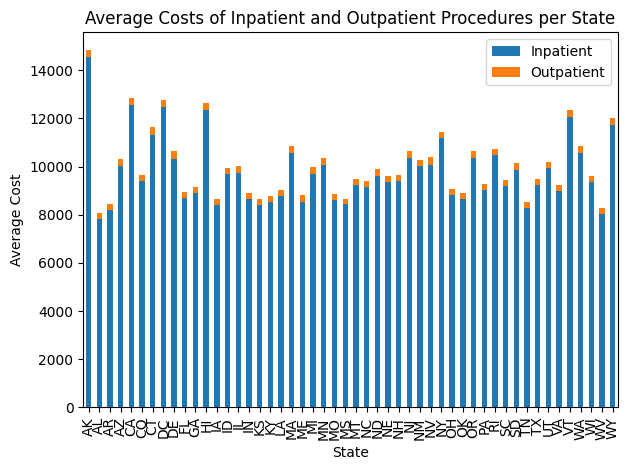

In [ ]:
#Group the data by state to know the average total payments for each state
avg_costs = merged_data.groupby('Provider State')[['Average Total Payments_x','Average Total Payments_y']].mean()
plt.figure(figsize=(28,8))
avg_costs.plot(kind='bar', stacked=True)
plt.title('Average Costs of Inpatient and Outpatient Procedures per State')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.legend(['Inpatient', 'Outpatient'])
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


We can see from the above graph that the inpatient average costs of Inpatient is much higher than the average costs of Outpatient for all 50 states. In comparison for Texas the average costs of Outpatient is 254 dollars when the Inpatient average cost is 9644 dollars.

The average between outpatient and inpatient procedures in the USA can be attributed to some factors:
1. Inpatient procedures includes higher costs due to the hospitalization such as staff, equipment, and facilities for an extended period. Outpatient procedures typically require fewer resources and less time, thereby reducing average costs.

2. Inpatient procedures tend to include more complex treatments, requiring specialized care. This level of care contributes to higher costs.

3. Inpatient procedures often take longer hospital stays, increasing costs associated with room and board, nursing care, and monitoring. Outpatient procedures allow patients to leave the same day, minimizing these expenses.

4. Inpatient procedures may require more medical supplies, medications, and specialized equipment, contributing to higher overall costs.








Additionally, the highest inpatient average cost is in Alaska state (15274 dollars), the lowest inpatient average cost in Alabama (8228 dollars). Alabama has a more competitive healthcare market or more efficient healthcare infrastructure that allows for lower costs compared to other state.

Alaska has a lower population density and is more geographically spread out thanother state. This could result in higher costs due to challenges in providing healthcare services to remote or sparsely populated areas. Transportation and logistical hurdles may contribute to increased expenses in delivering care in Alaska.


The lowest oupatient average cost is in Mississipi (238 dollars), the highest oupatient average cost is in New Jersey (316 dollars).
New Jersey generally has a more competitive and expensive healthcare market. Factors such as the concentration of healthcare facilities, the availability of specialized care. New Jersey's higher population density and more urbanized areas might lead to higher operational costs for healthcare facilities, thereby impacting the overall cost of outpatient care.

***Task 2***

For the same procedure, is there any cost difference between inpatient and outpatient care? Visualize the result.

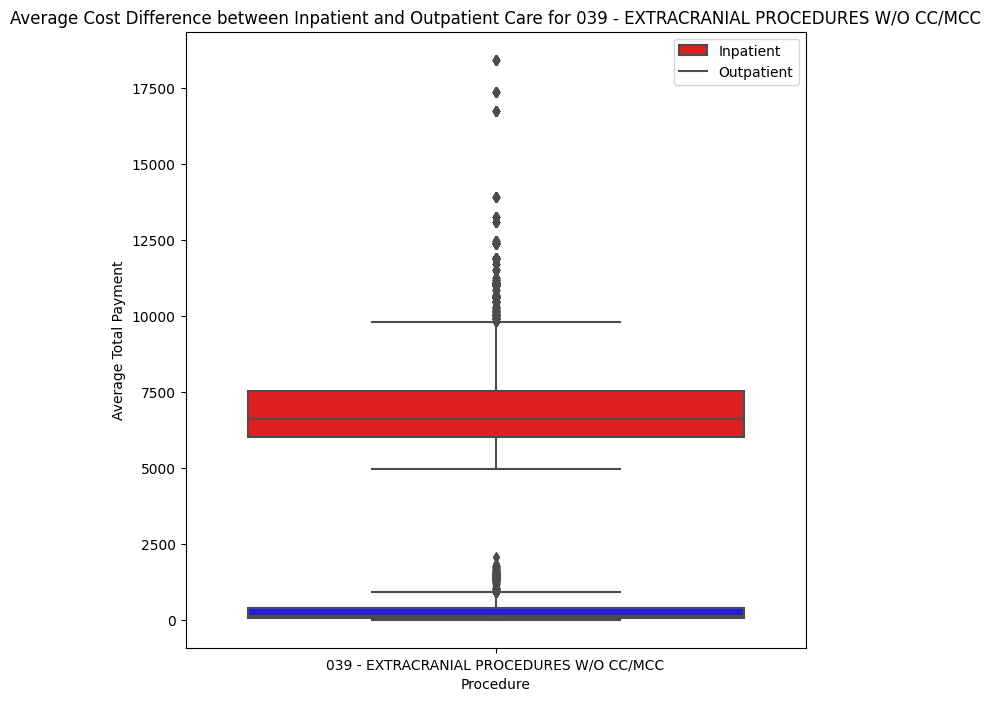

In [ ]:
import seaborn as sns

#Lets choose the specific procedure 039
# Filter data for the chosen procedure
procedure_data = merged_data[merged_data['DRG Definition'] == '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC']
plt.figure(figsize=(8, 8))
sns.boxplot(x='DRG Definition', y='Average Total Payments_x', data=procedure_data, color='red')
sns.boxplot(x='DRG Definition', y='Average Total Payments_y', data=procedure_data, color='blue')
plt.title('Average Cost Difference between Inpatient and Outpatient Care for 039 - EXTRACRANIAL PROCEDURES W/O CC/MCC')
plt.xlabel('Procedure')
plt.ylabel('Average Total Payment')
plt.legend(['Inpatient', 'Outpatient'])
plt.show()



I compared the total average cost of Inpatient and Outpatient for the same procedure. The boxplots above are showing the average cost of Inpatient and Outpatient for the procedure 039 in DRG definition. 039 typically refers to a grouping of extracranial procedures without complications or major comorbidities. We can see from the boxplot how data distributed and outliers, maximum and minimum values, quartile. We clearly can see the average total payment for this procedure of Inpatient is much higher than for Outpatient. Inpatient care become necessary for this procedure 039 , leading to increased costs due to emergency interventions and extended hospital stays.
Extracranial procedures without complications or major comorbidities, outpatient care tends to be less costly than inpatient care due to the shorter duration of care, reduced need for intensive resources, and prescribed nedication at home.

***Task 3***

Visualize and compare the inpatient/outpatient ratio among different states.


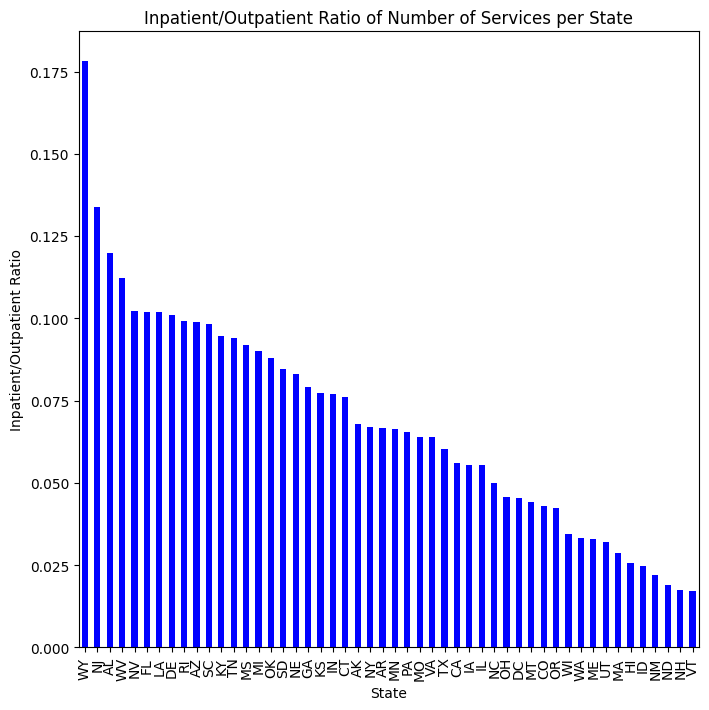

In [ ]:
#Group by provider state and find the amount of Inpatient over Outpatient number of services in hospital
per_state = merged_data.groupby('Provider State')[['Total Discharges', 'Outpatient Services']].sum()
per_state['Inpatient_Outpatient_Ratio'] = per_state['Total Discharges']/per_state['Outpatient Services']
# Sort the data
per_state.sort_values('Inpatient_Outpatient_Ratio', ascending=False, inplace=True)
plt.figure(figsize=(8, 8))
per_state['Inpatient_Outpatient_Ratio'].plot(kind='bar', color='blue')
plt.title('Inpatient/Outpatient Ratio of Number of Services per State')
plt.xlabel('State')
plt.ylabel('Inpatient/Outpatient Ratio')
plt.xticks(rotation=90)
plt.show()


As we can see from thr plot above the Number of services for Inpatient care is less than for Outpatient care for each state (smoothly decrease from 0.18 up to 0.02).
As mentioned above the reason of this include the following: duration of care, care resources, severity of conditions. Due to very high cost for Inpatient care in comparison with Outpatient care can cause this trend. People choose to use the Outpatient care due to very high cost of the out - pocket for treatment. They prefer to stay at home and do treatmnet with medications.

***Task 4***

Visualize and compare the cost of the same procedure among different states.

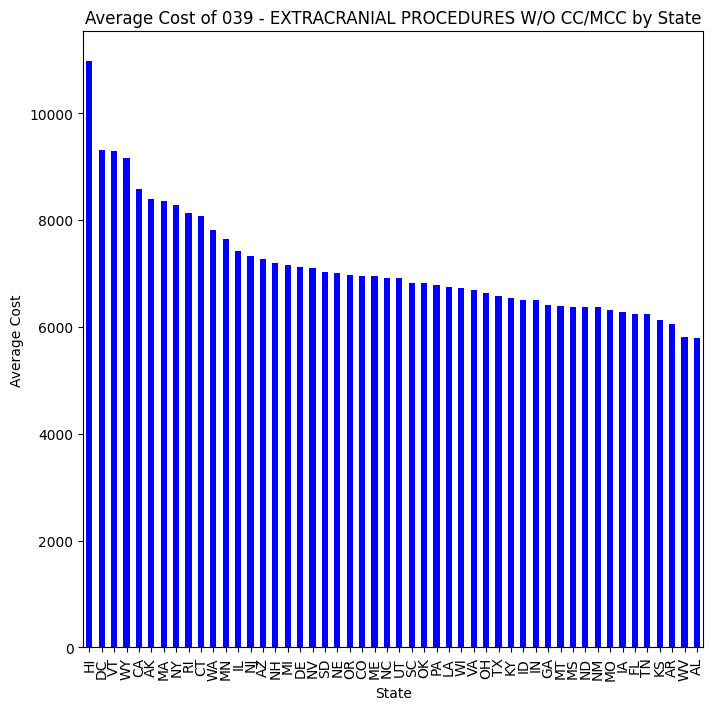

In [ ]:
#Compare cost of specific procedure in a different state
data_by_state = merged_data[merged_data['DRG Definition'] == '039 - EXTRACRANIAL PROCEDURES W/O CC/MCC']
average_cost_per_state = data_by_state.groupby('Provider State')['Average Total Payments_x'].mean().sort_values(ascending=False)
plt.figure(figsize=(8, 8))
average_cost_per_state.plot(kind='bar', color='blue')
plt.title('Average Cost of 039 - EXTRACRANIAL PROCEDURES W/O CC/MCC by State')
plt.xlabel('State')
plt.ylabel('Average Cost')
plt.xticks(rotation=90)
plt.show()


We can see from the chart above that the average cost of the specific procedure (039 - EXTRACRANIAL PROCEDURE) is different for all states in USA. The highes average cost is in the Hawaii state (10982 dollars). The lowest average cost is in Alabama (5781 dollars). It is approximately in 2 times less that in the Hawaii. States with higher costs of living tend to have higher healthcare costs. Hawaii, known for its high cost of living due to factors like remote location, limited space, and import costs, tends to have higher healthcare expenses compared to states like Alabama, where the cost of living is generally lower.

***Task 5***

List the top 10 outpatient procedures, are they the same for each state?

The top procedures across all the states are:  0267 - Level III Diagnostic and Screening Ultrasound                                     2998
0269 - Level II Echocardiogram Without Contrast                                          2898
0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast    2855
0265 - Level I Diagnostic and Screening Ultrasound                                       2739
0377 - Level II Cardiac Imaging                                                          2564
0078 - Level III Pulmonary Treatment                                                     2304
0368 - Level II Pulmonary Tests                                                          2248
0604 - Level 1 Hospital Clinic Visits                                                    2210
0605 - Level 2 Hospital Clinic Visits                                                    2116
0207 - Level III Nerve Injections                                                        2002
Name: APC, dt

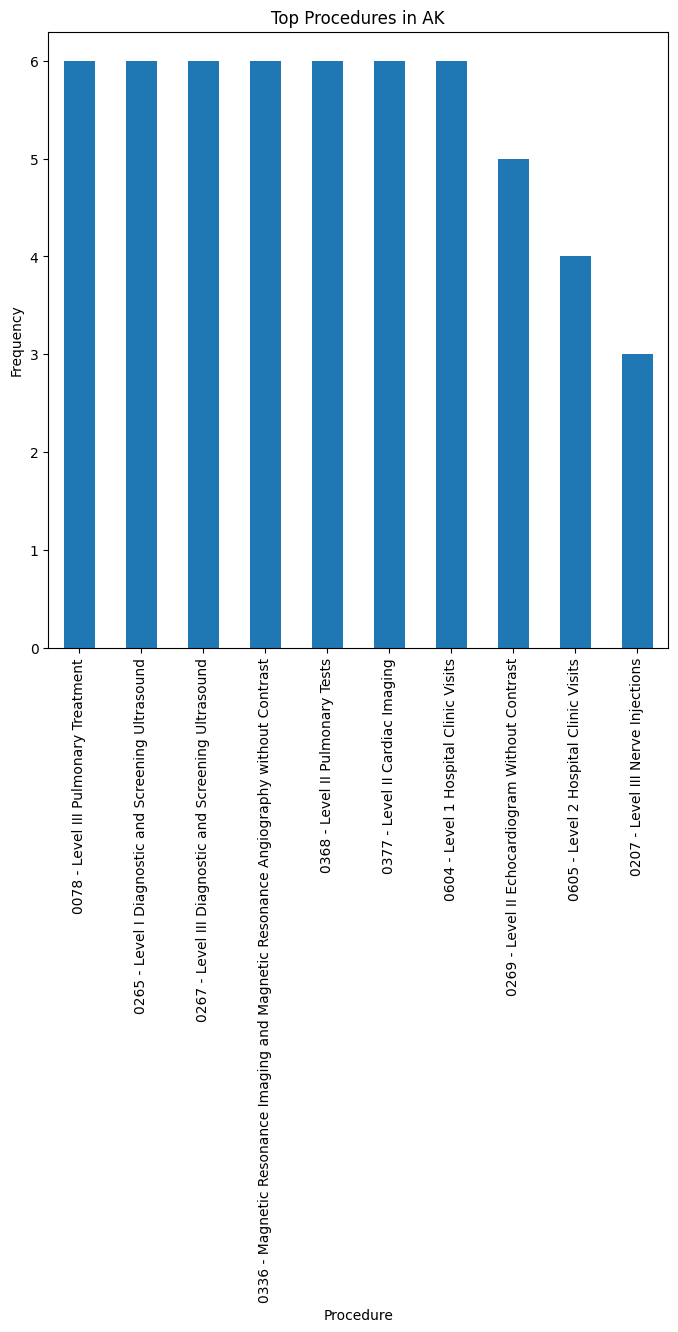

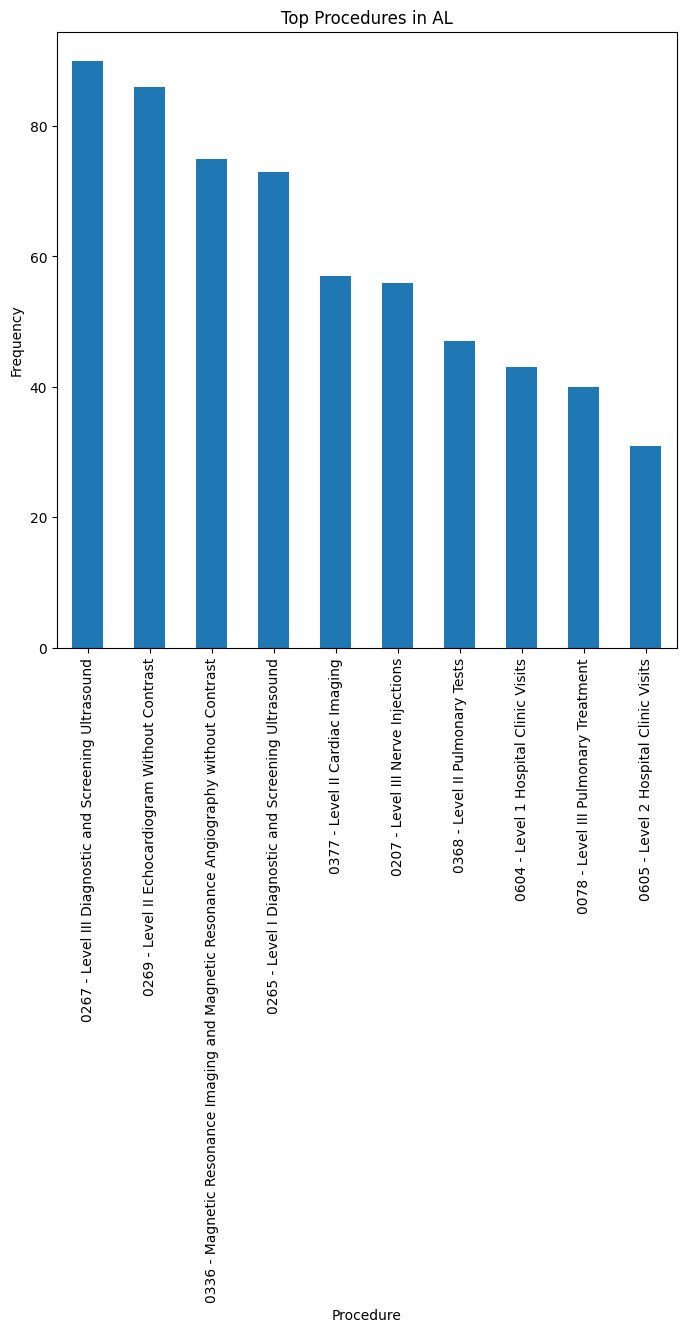

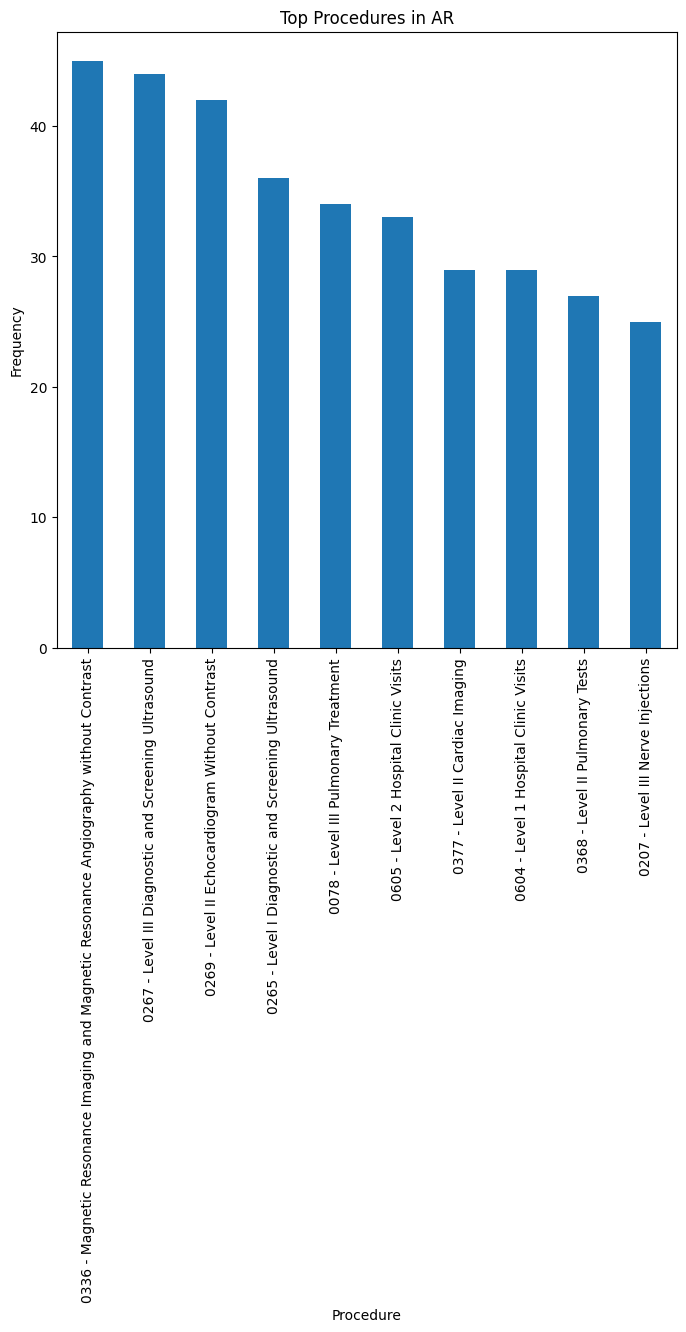

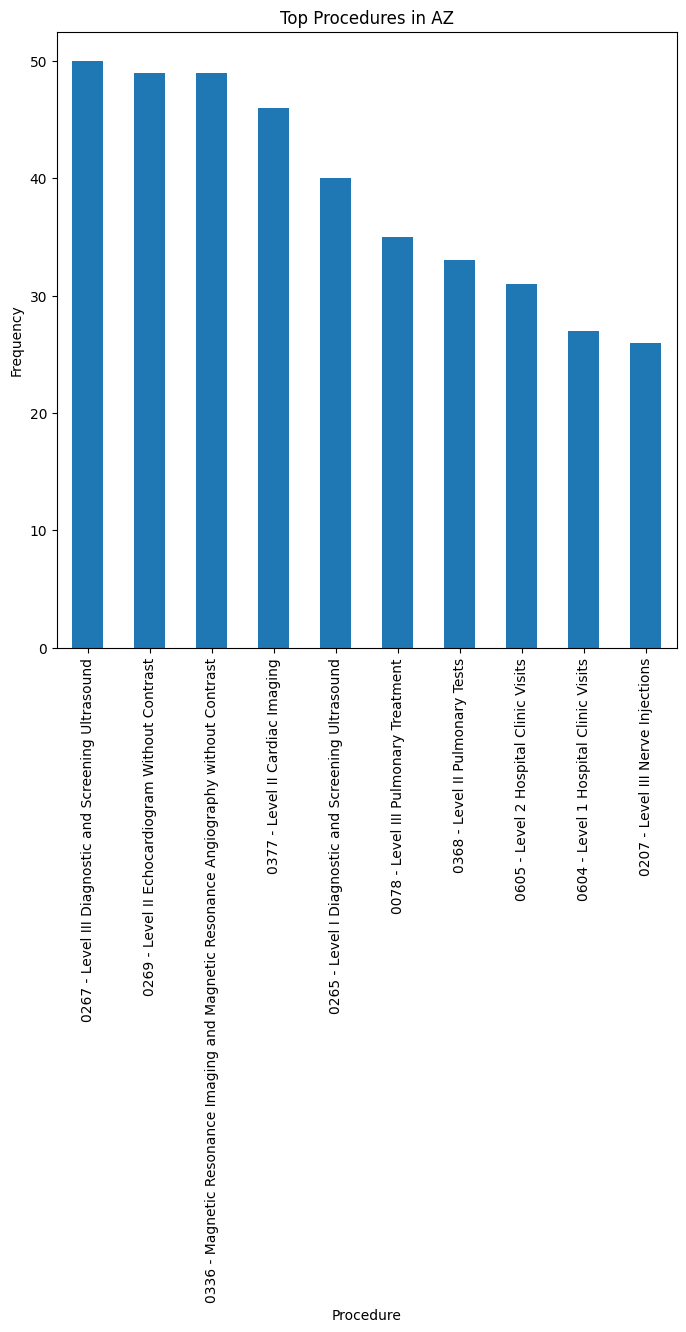

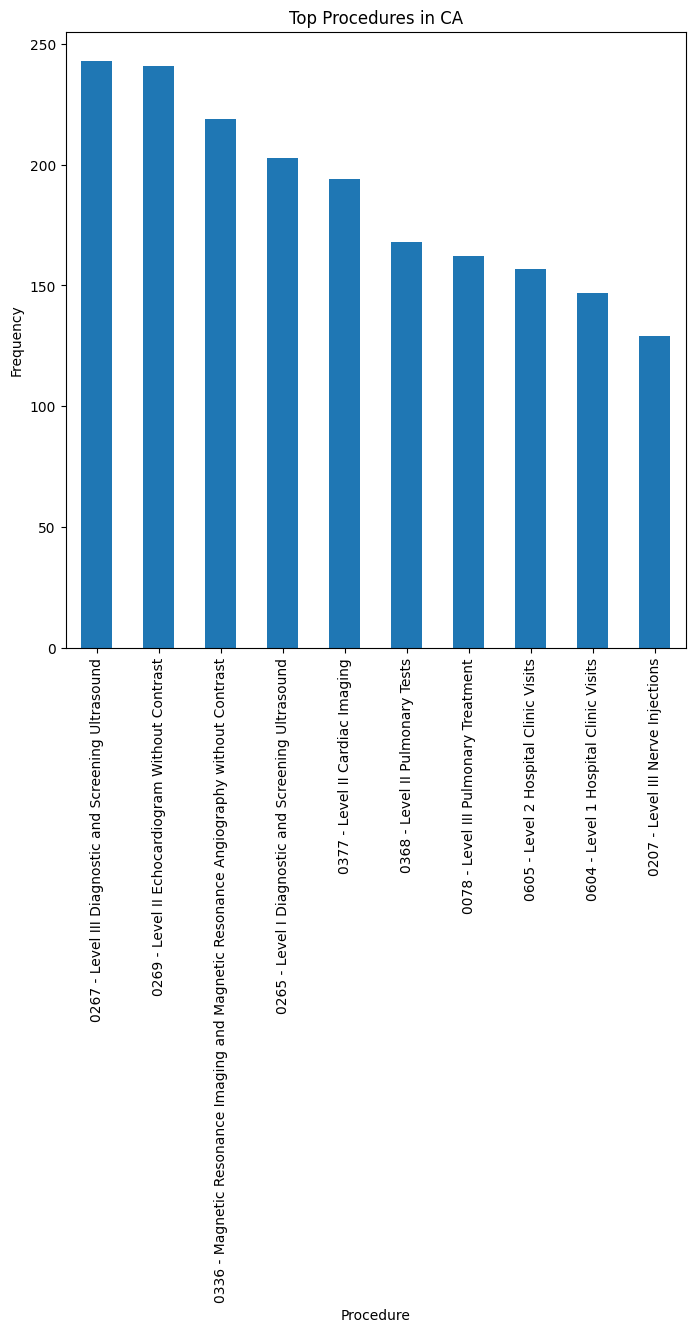

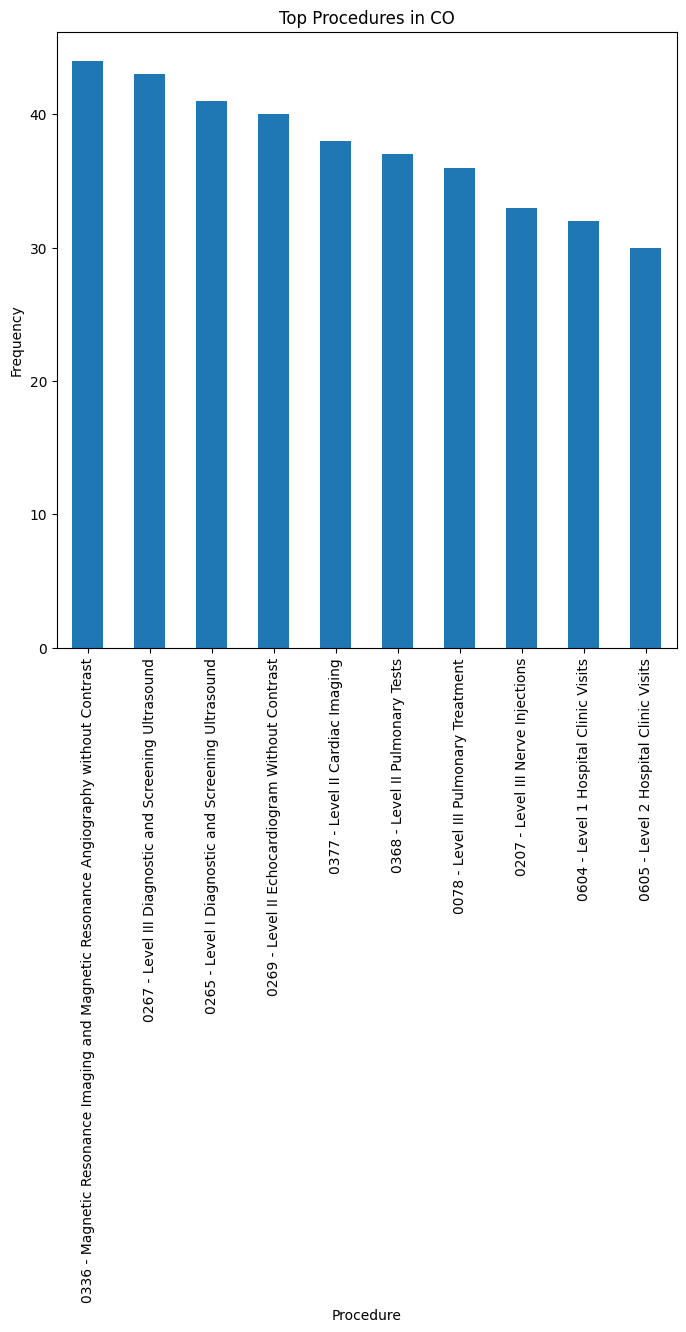

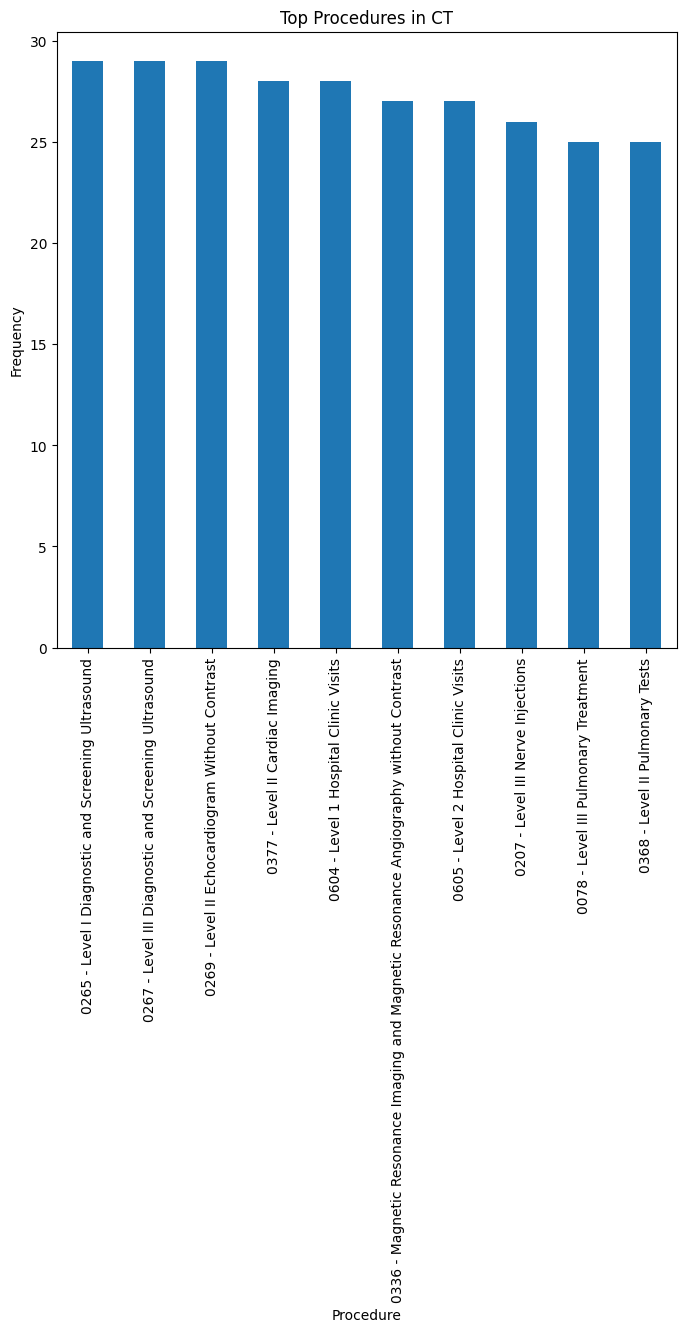

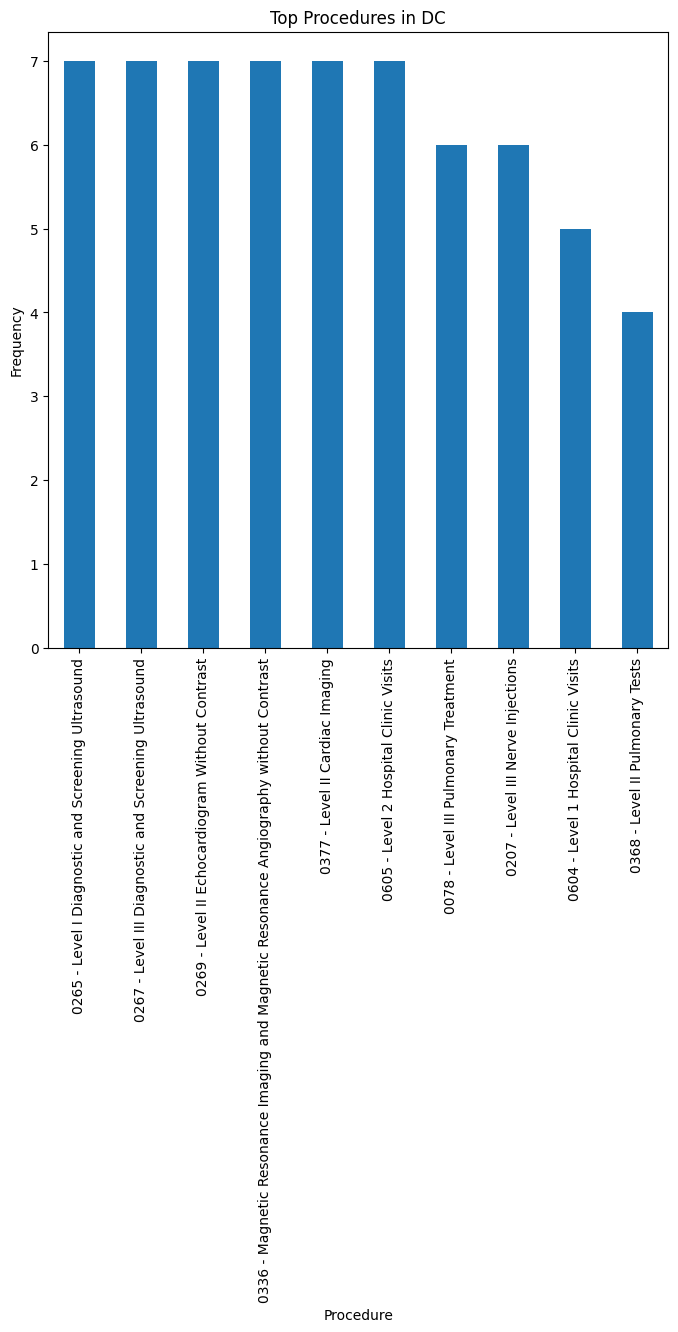

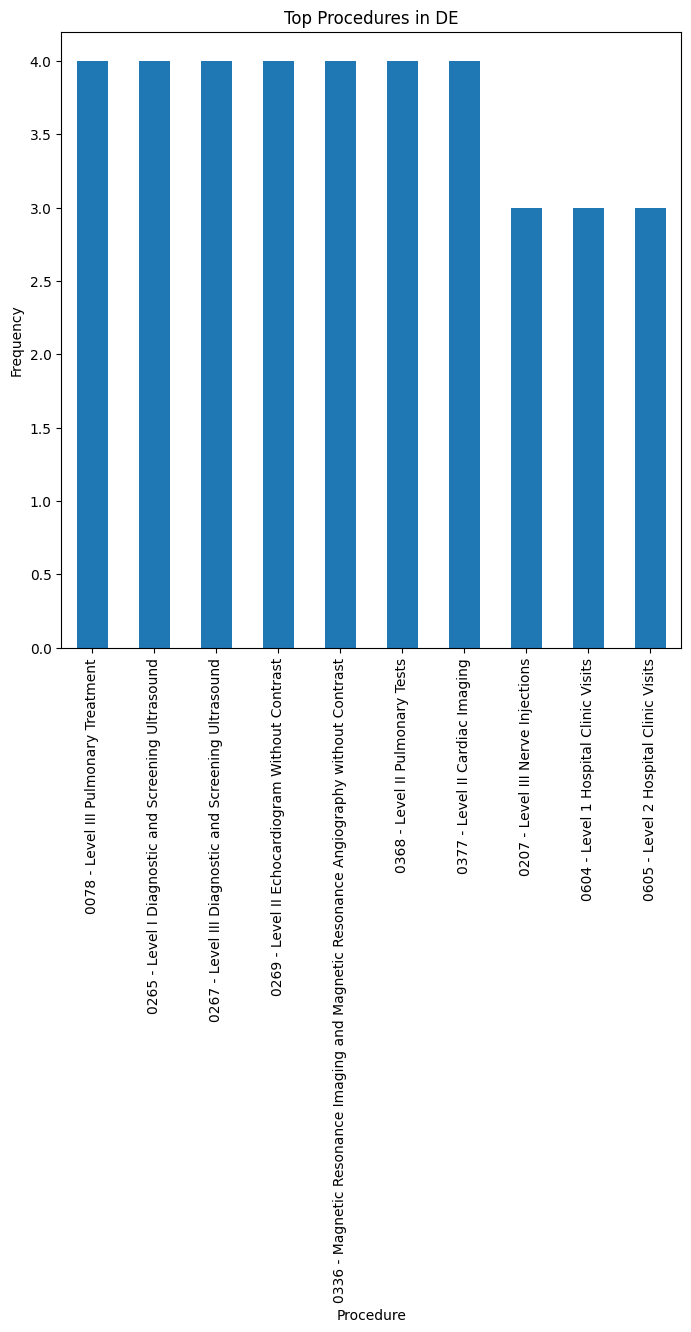

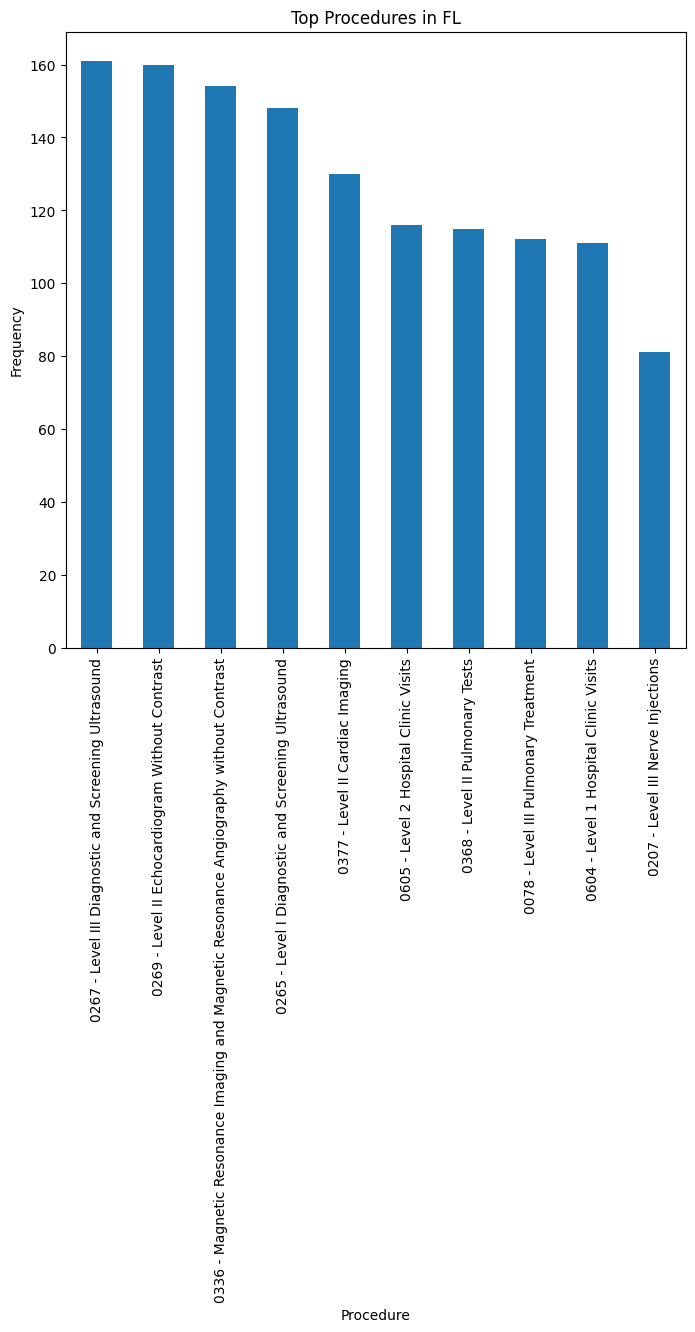

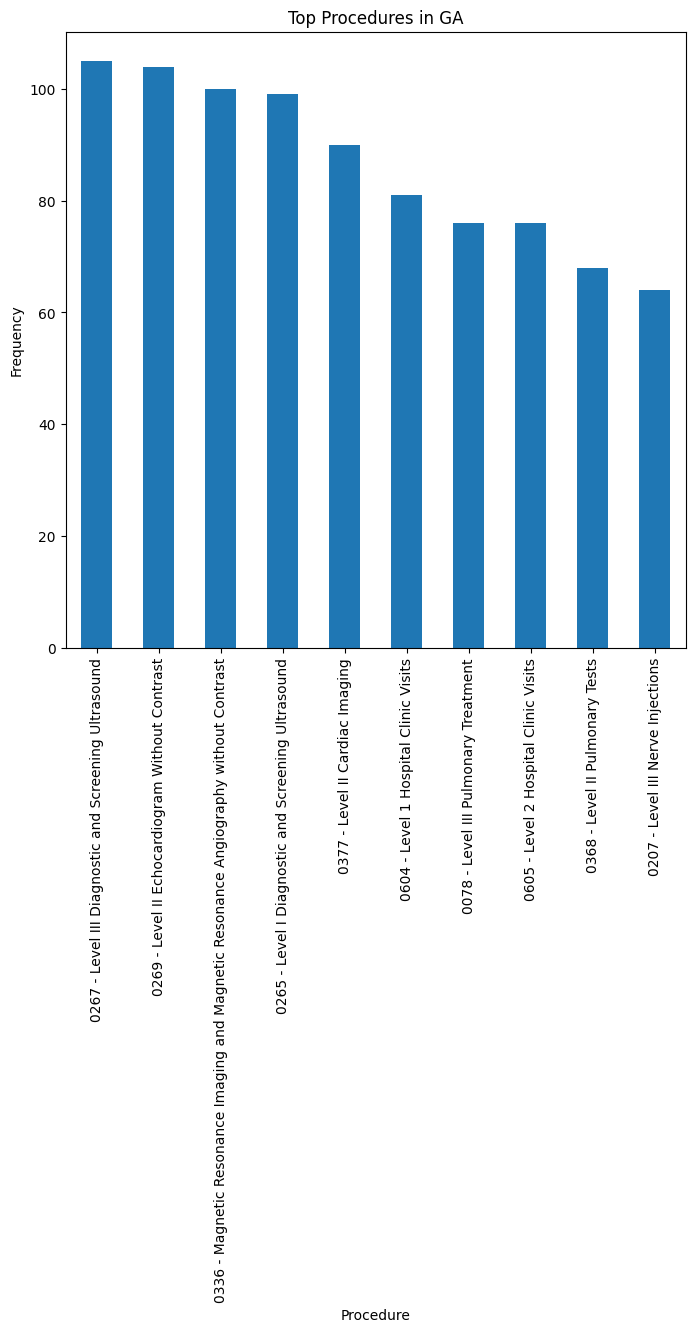

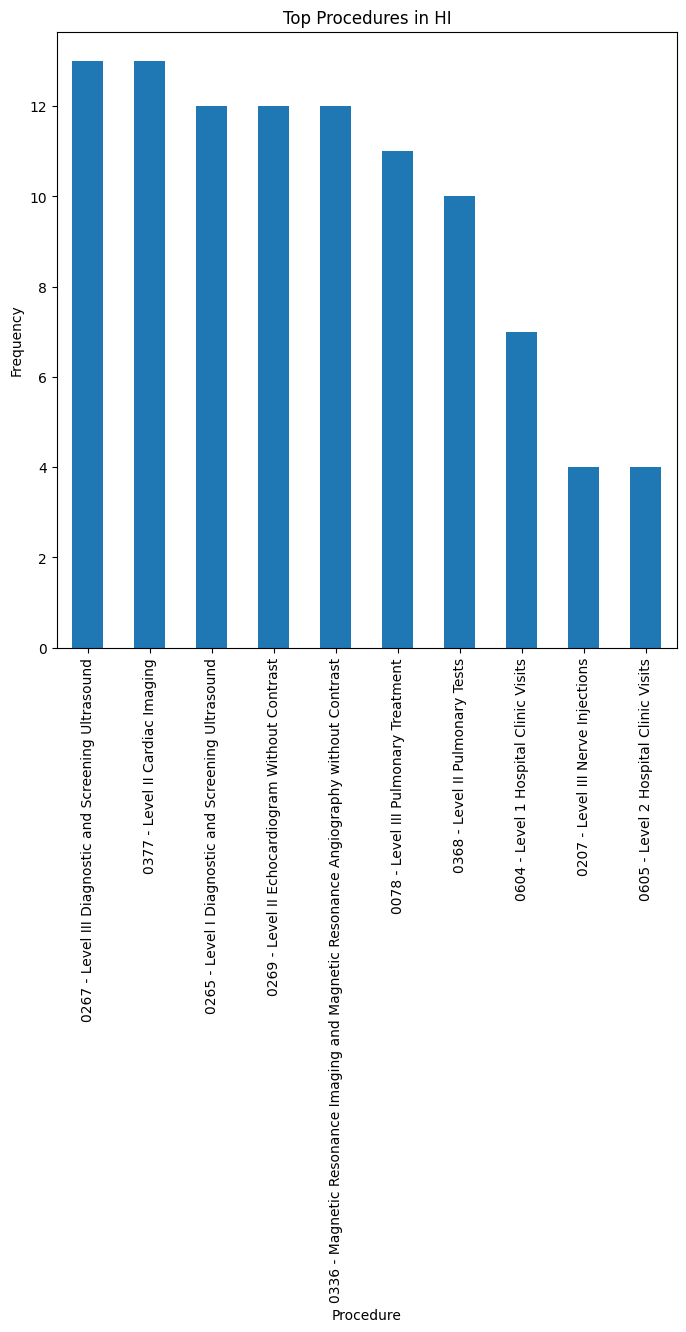

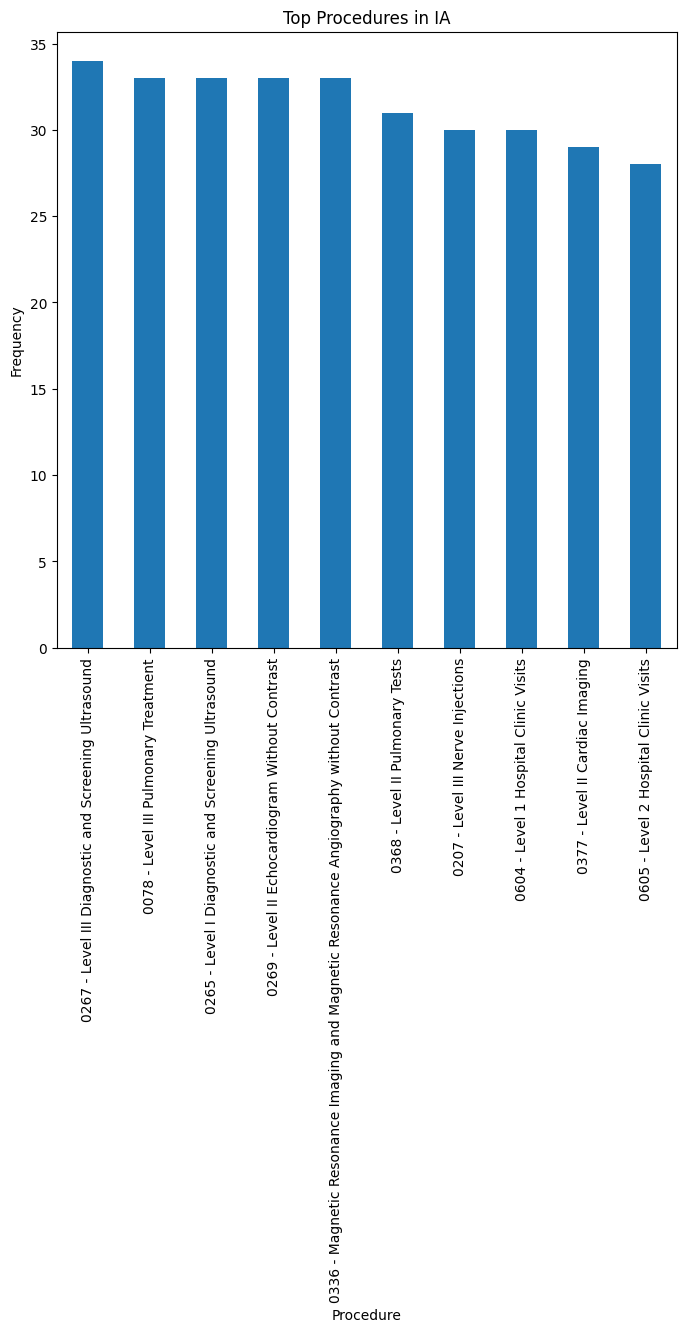

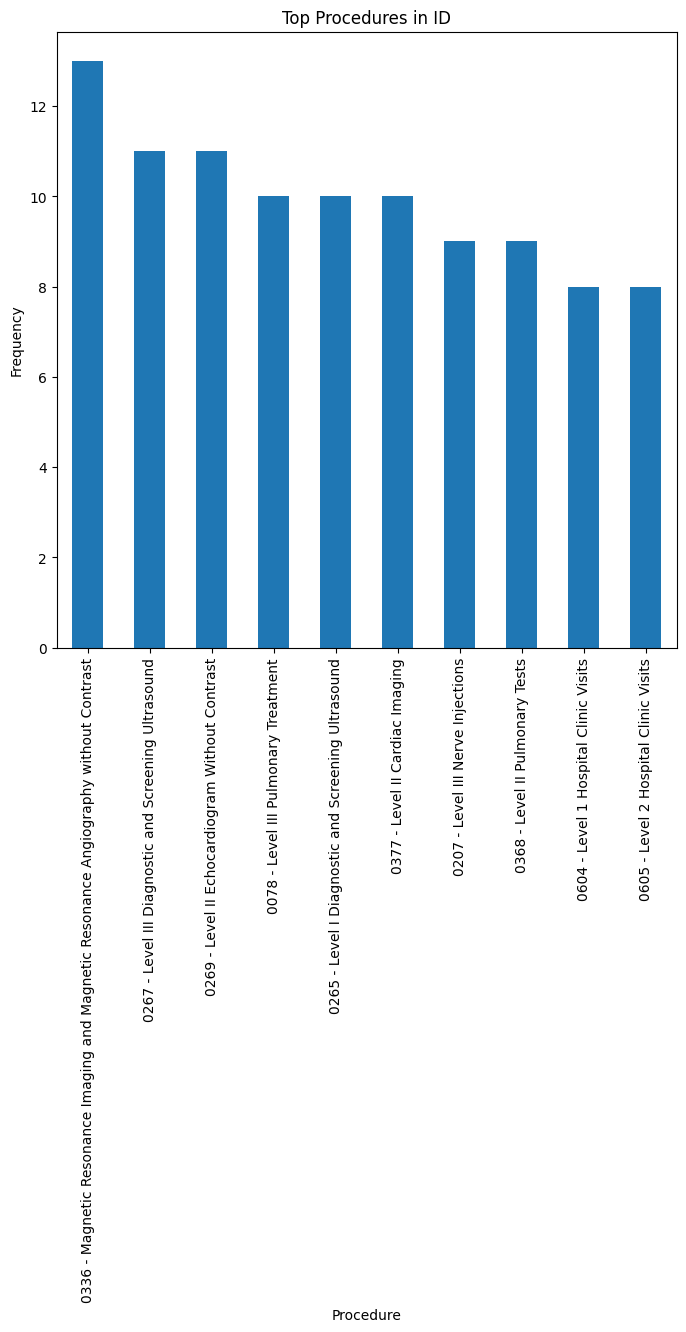

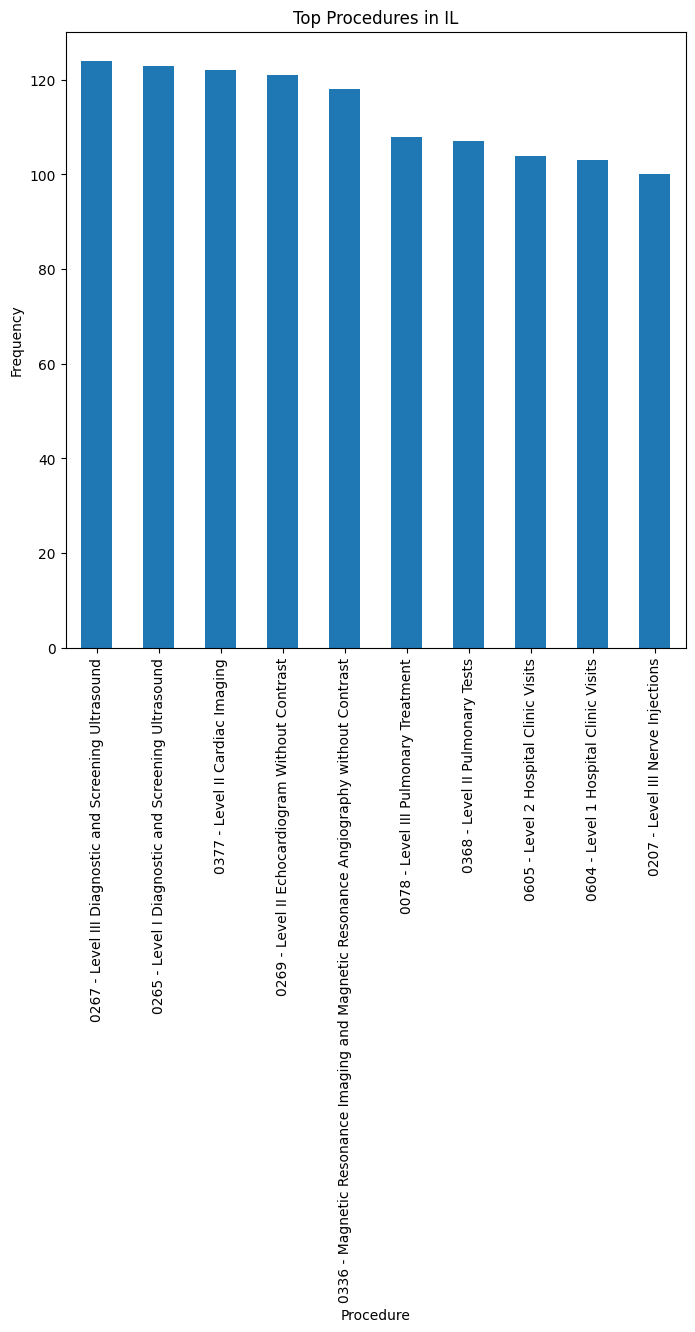

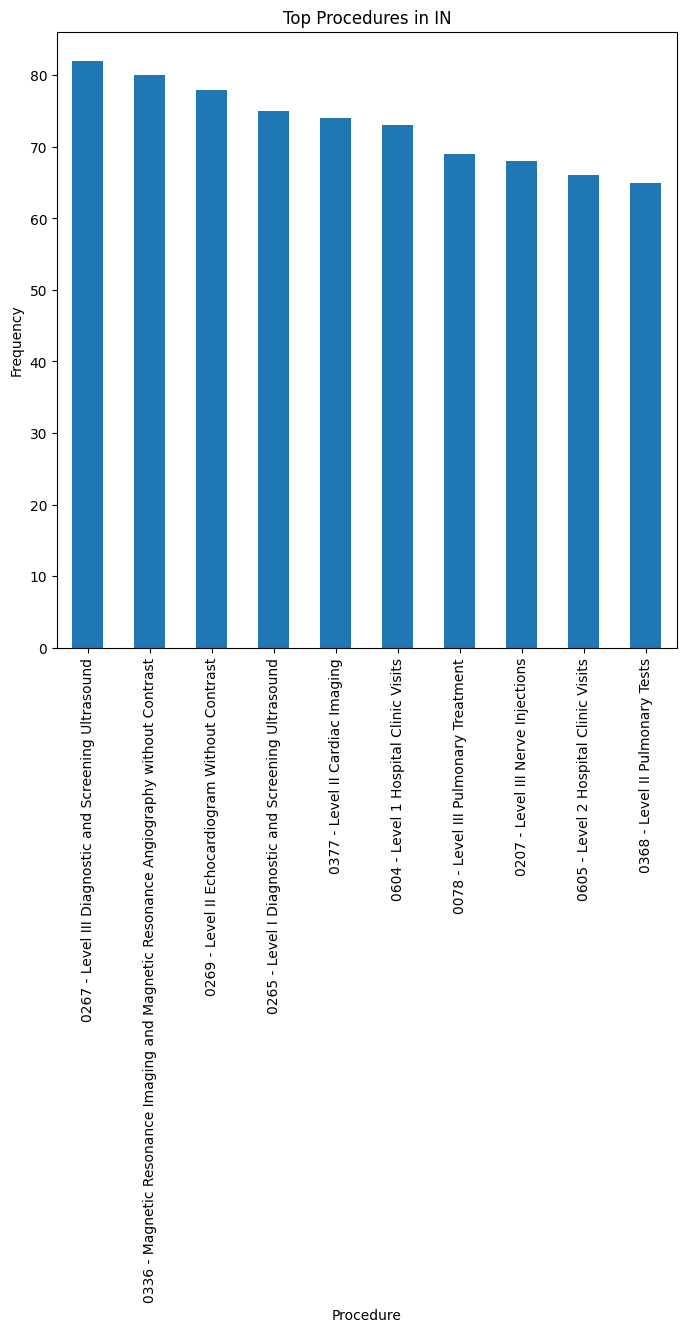

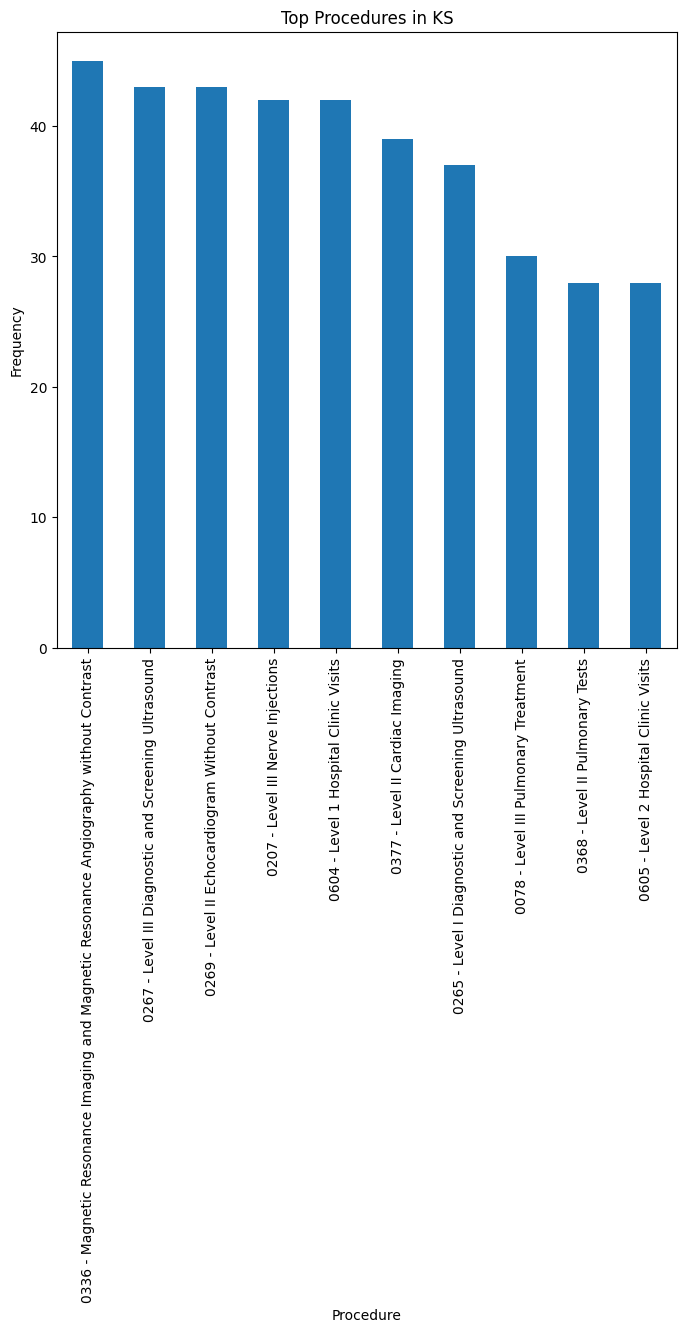

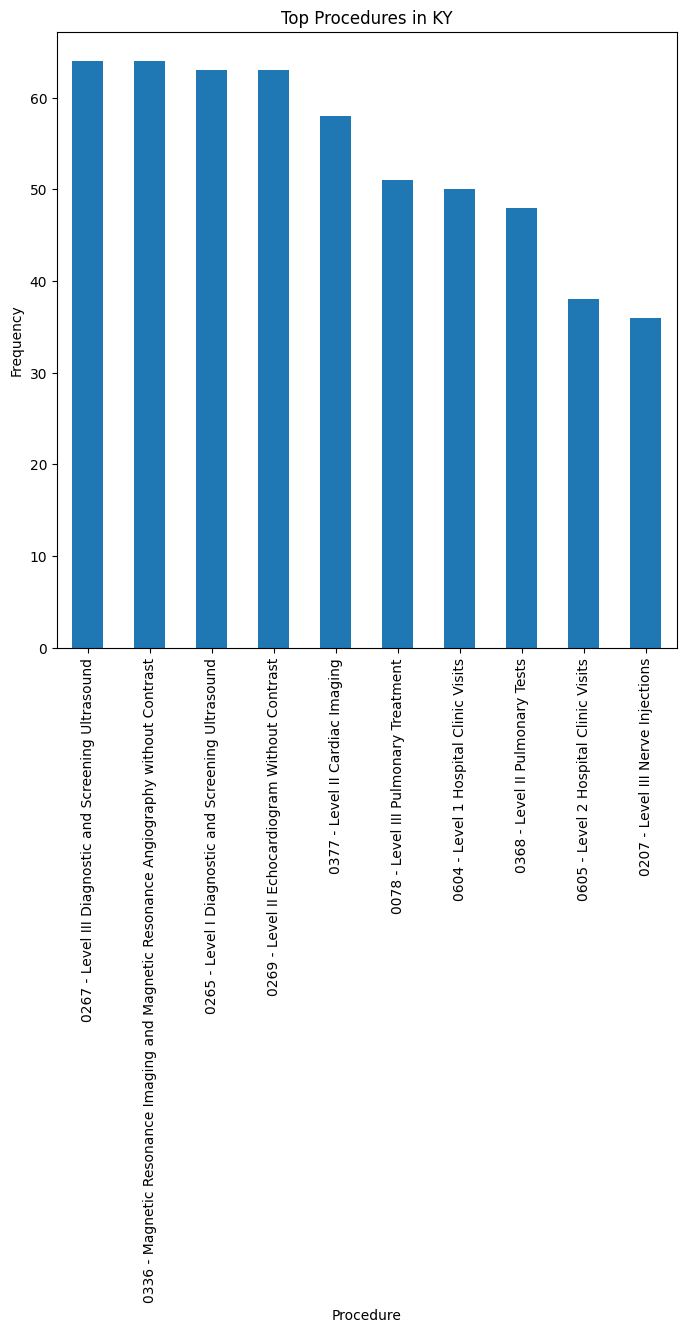

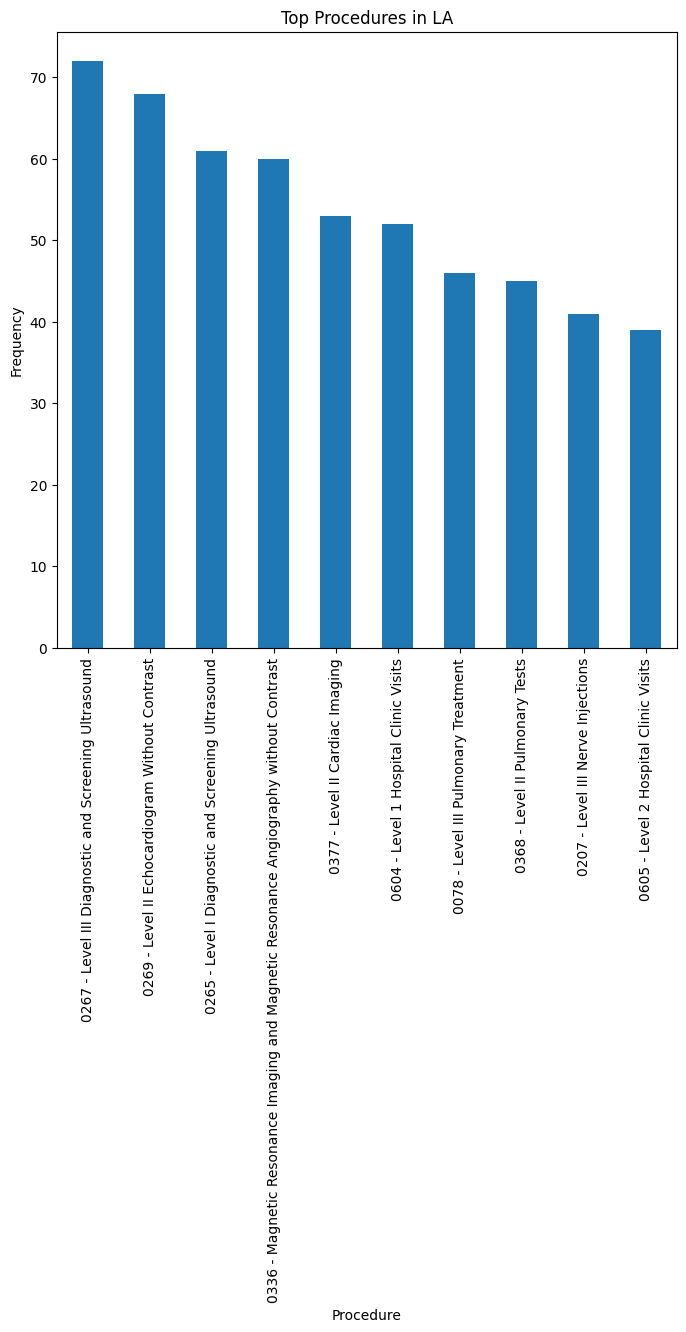

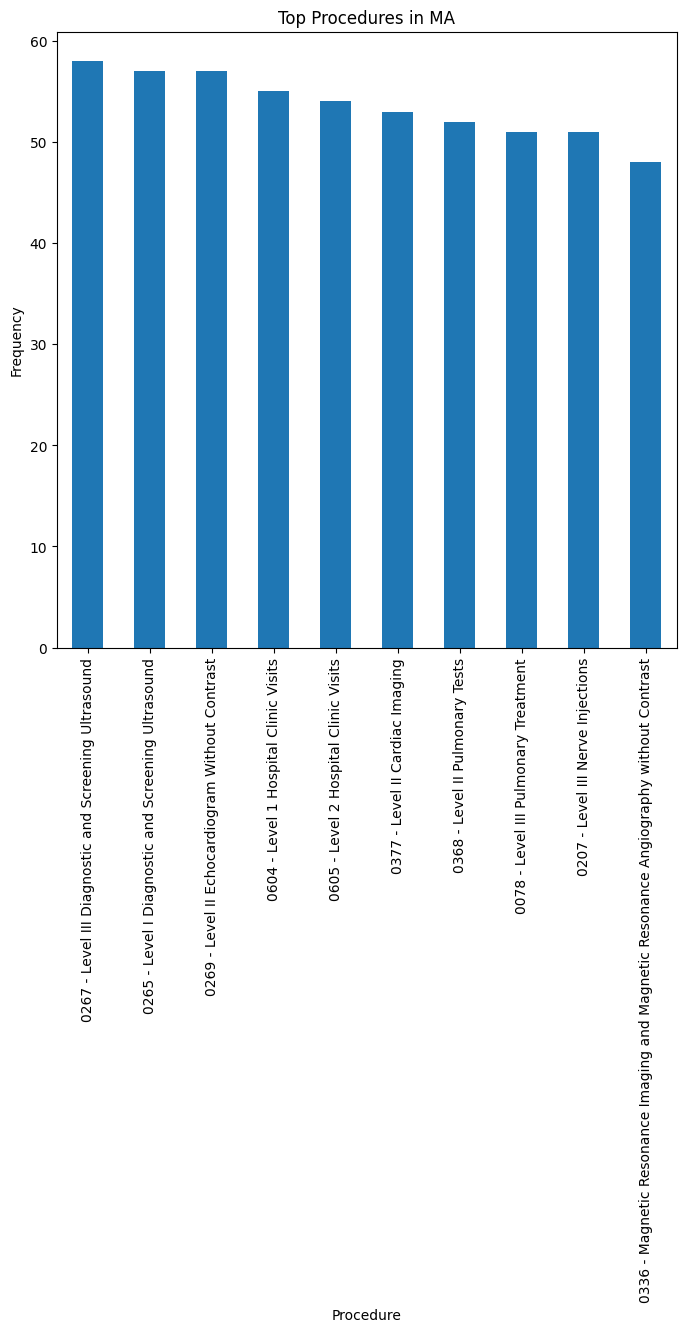

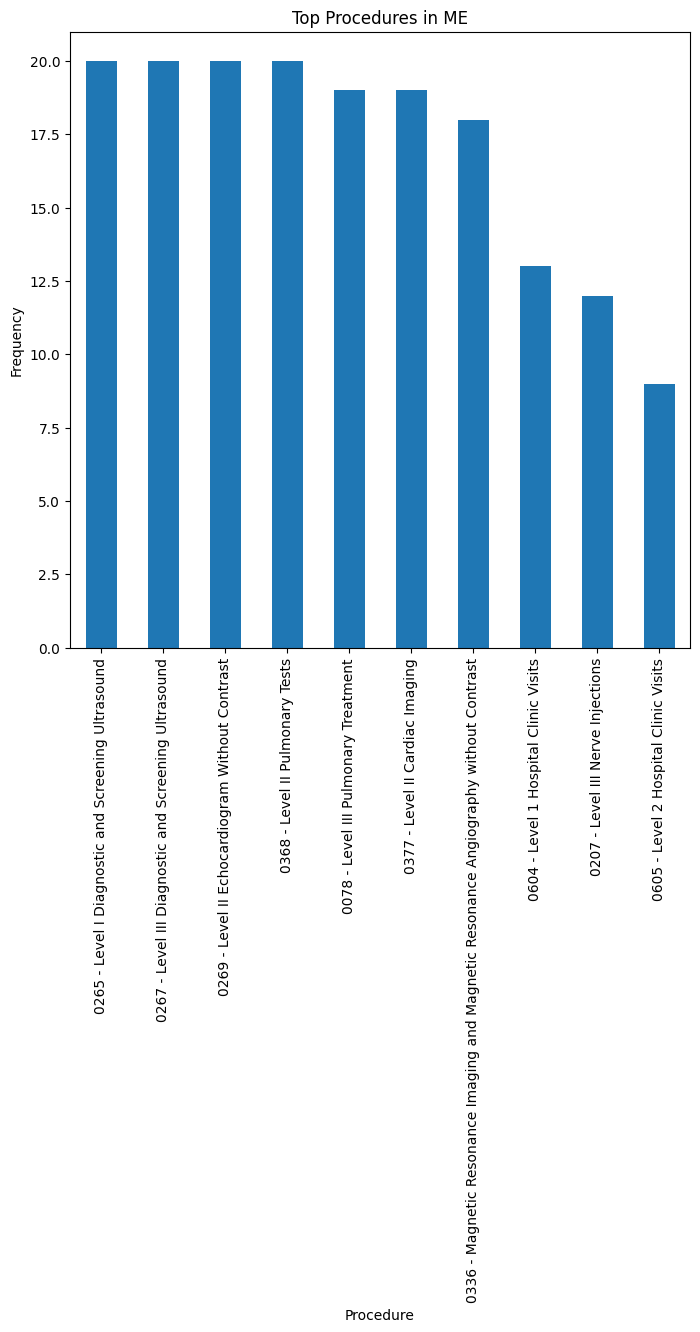

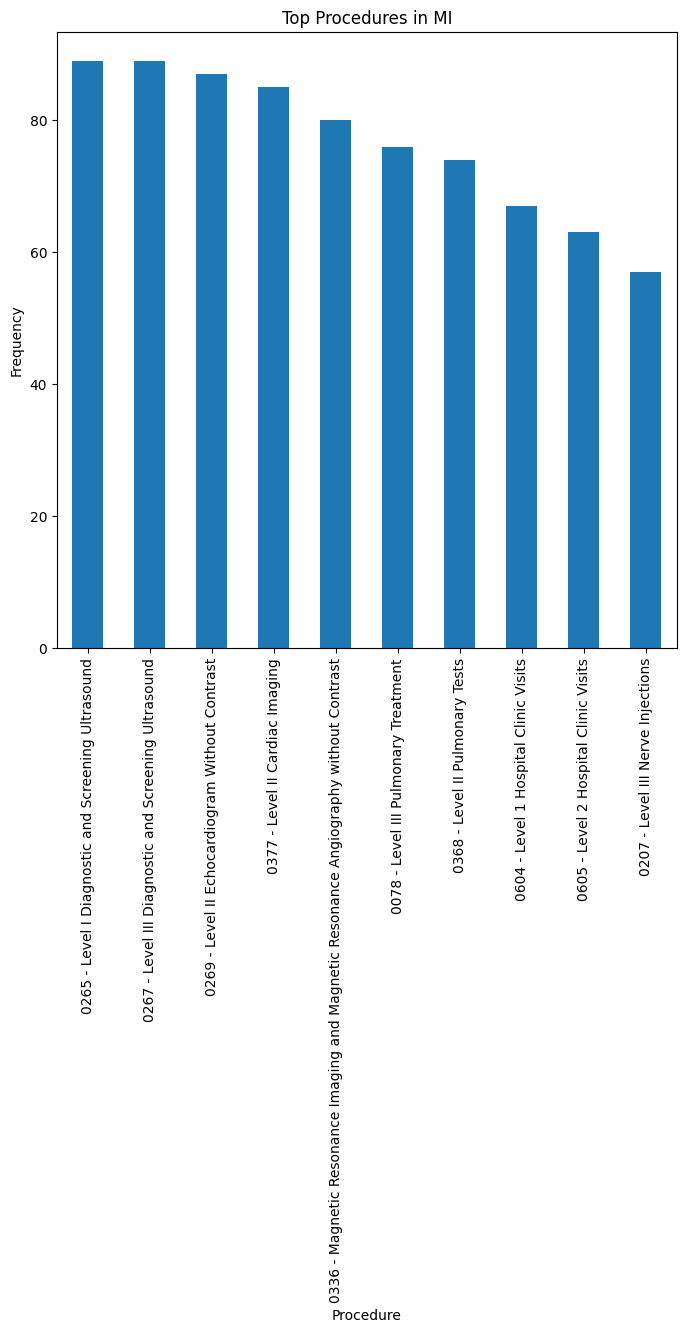

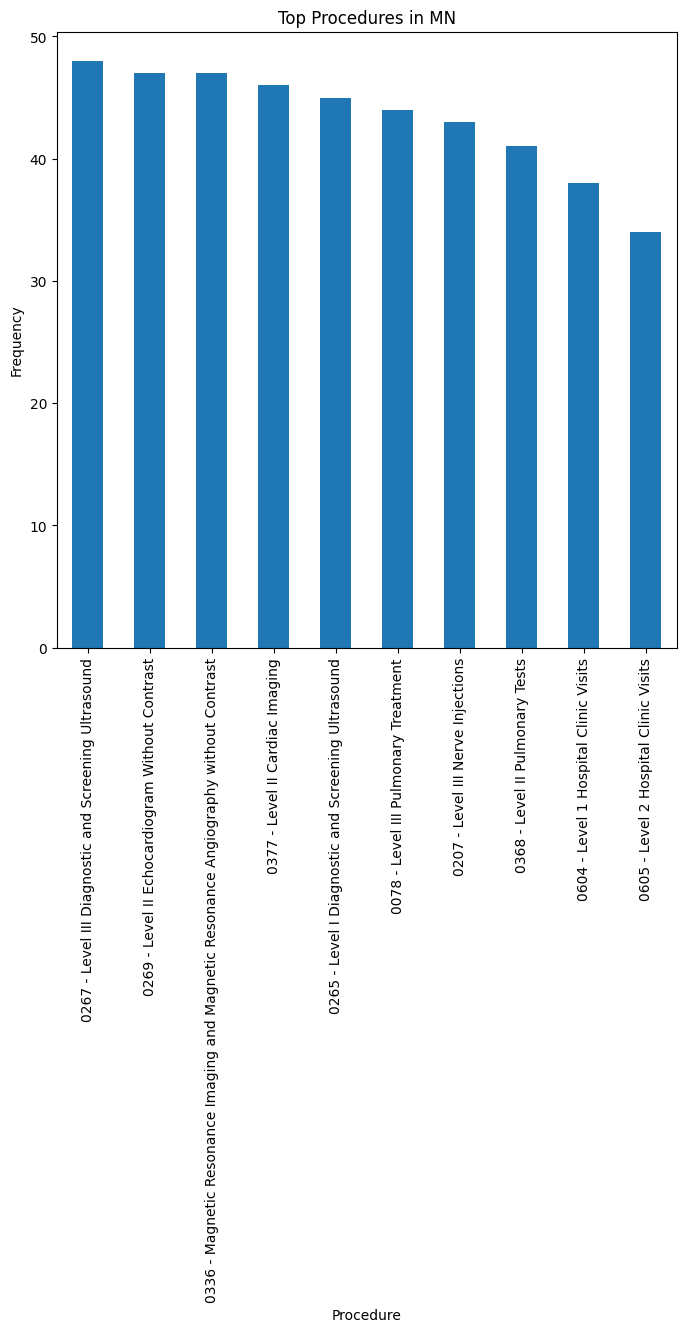

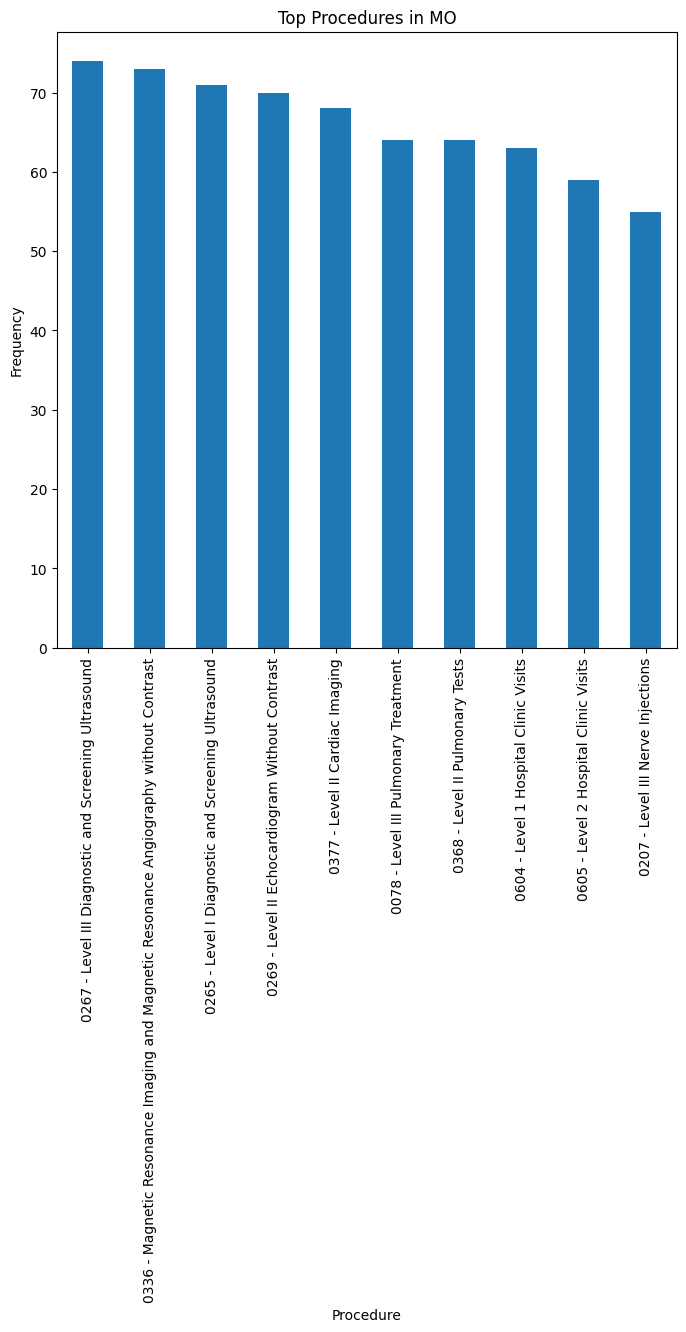

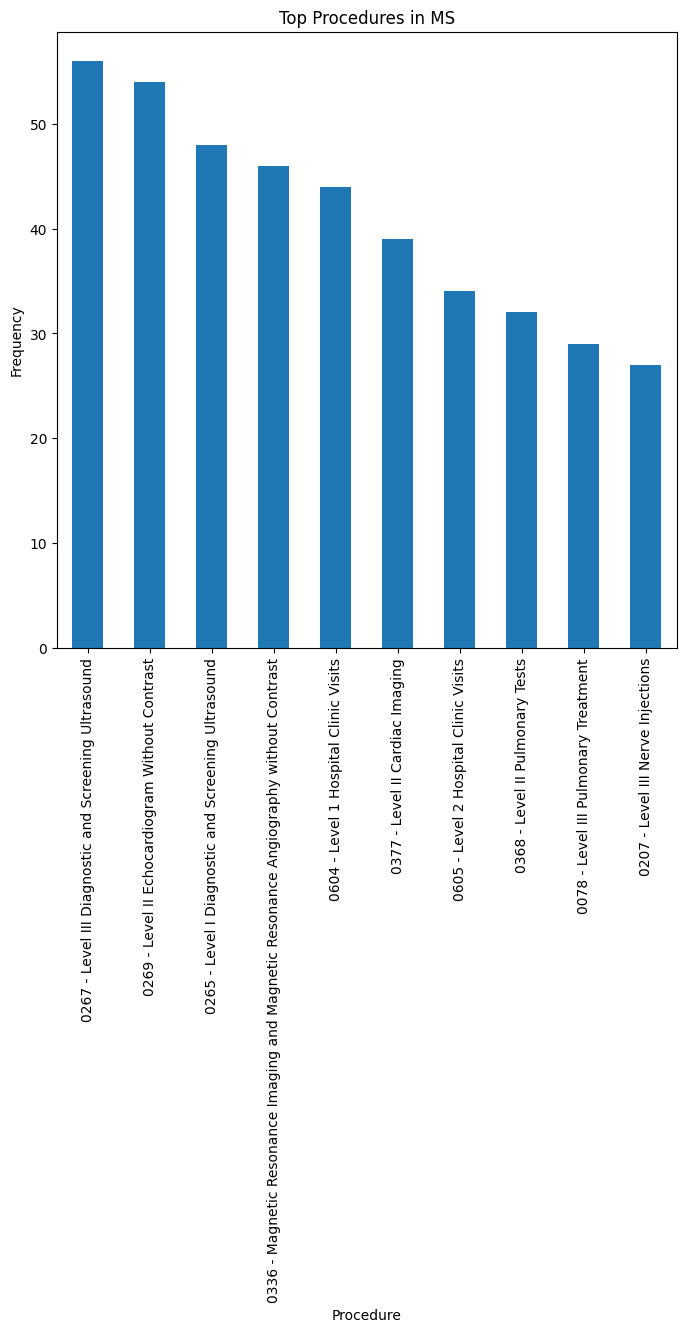

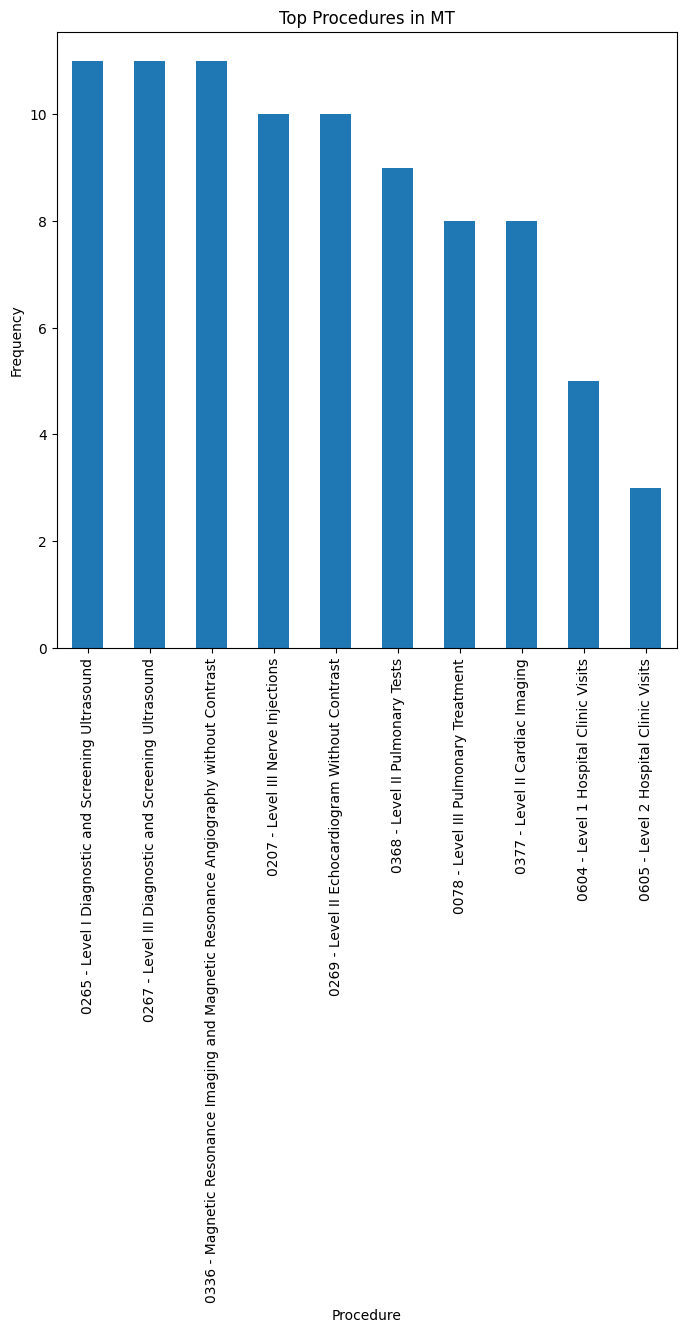

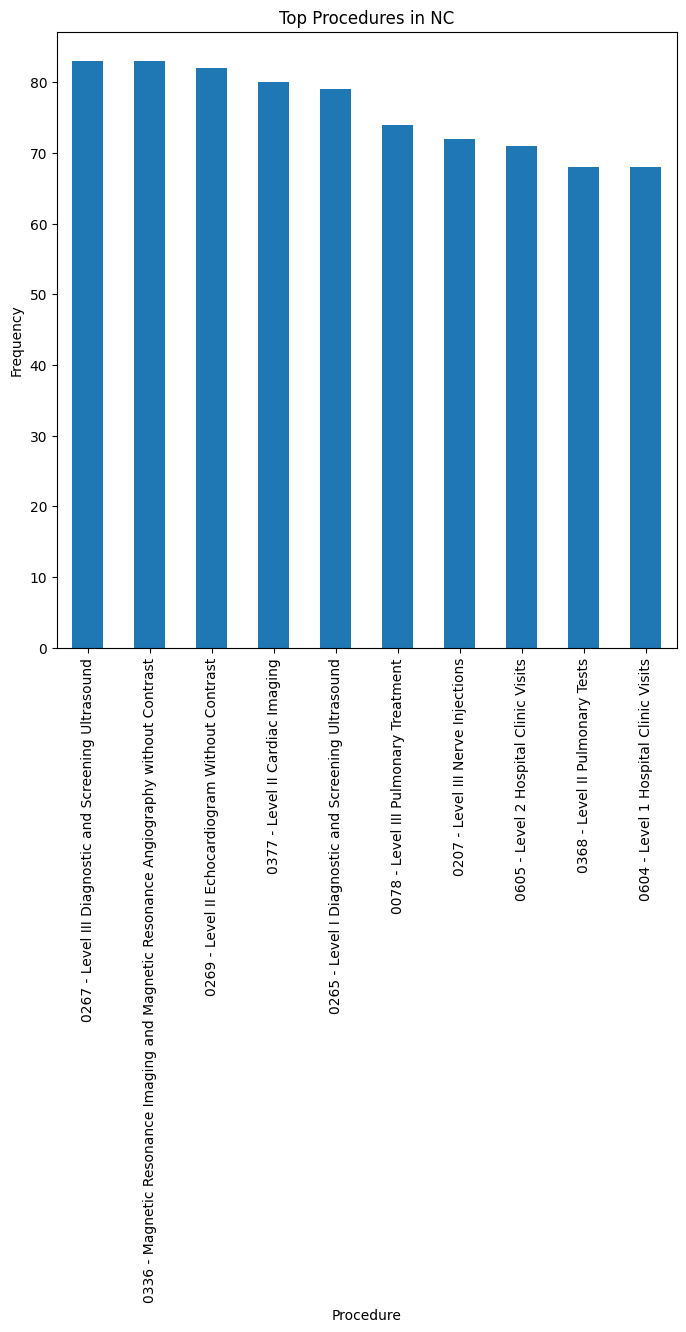

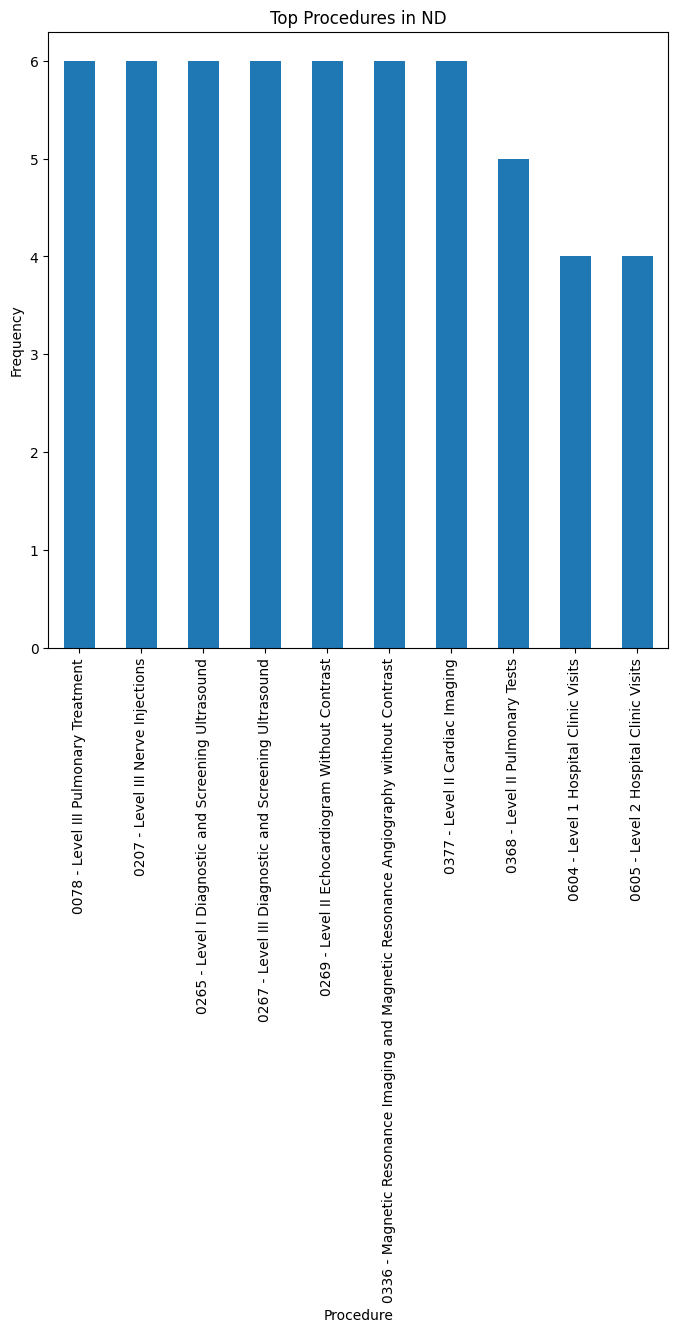

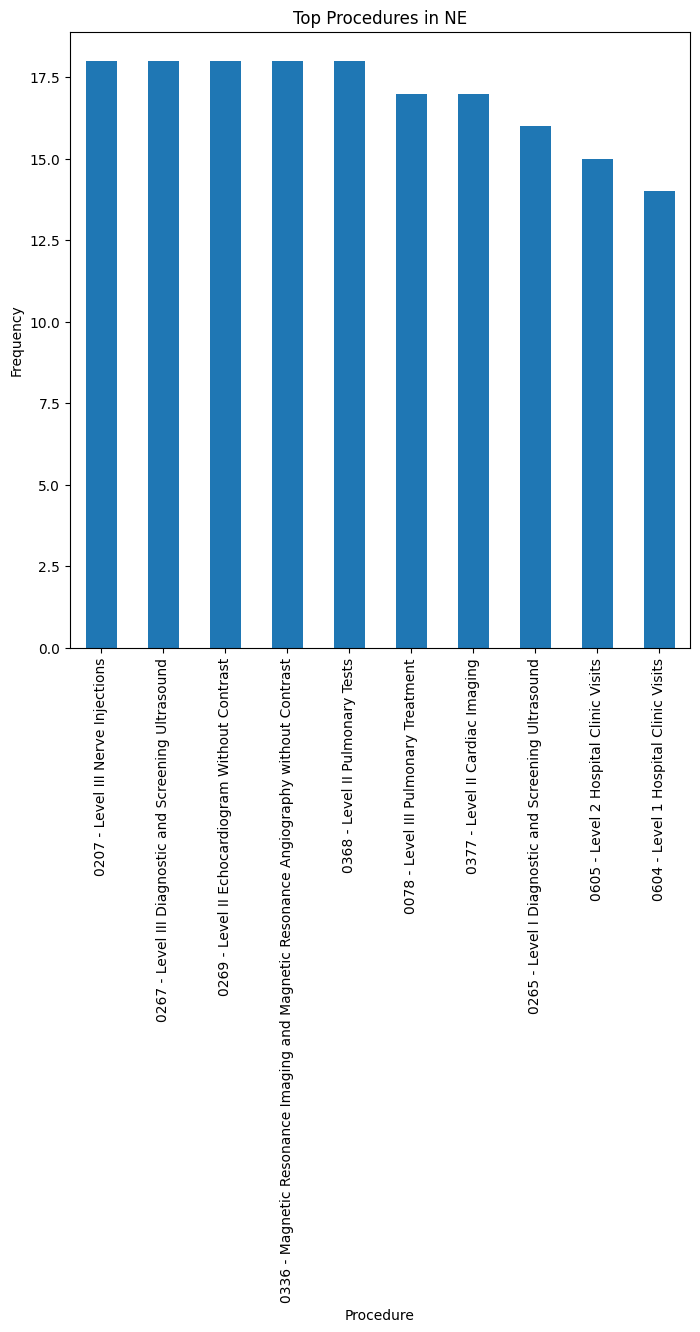

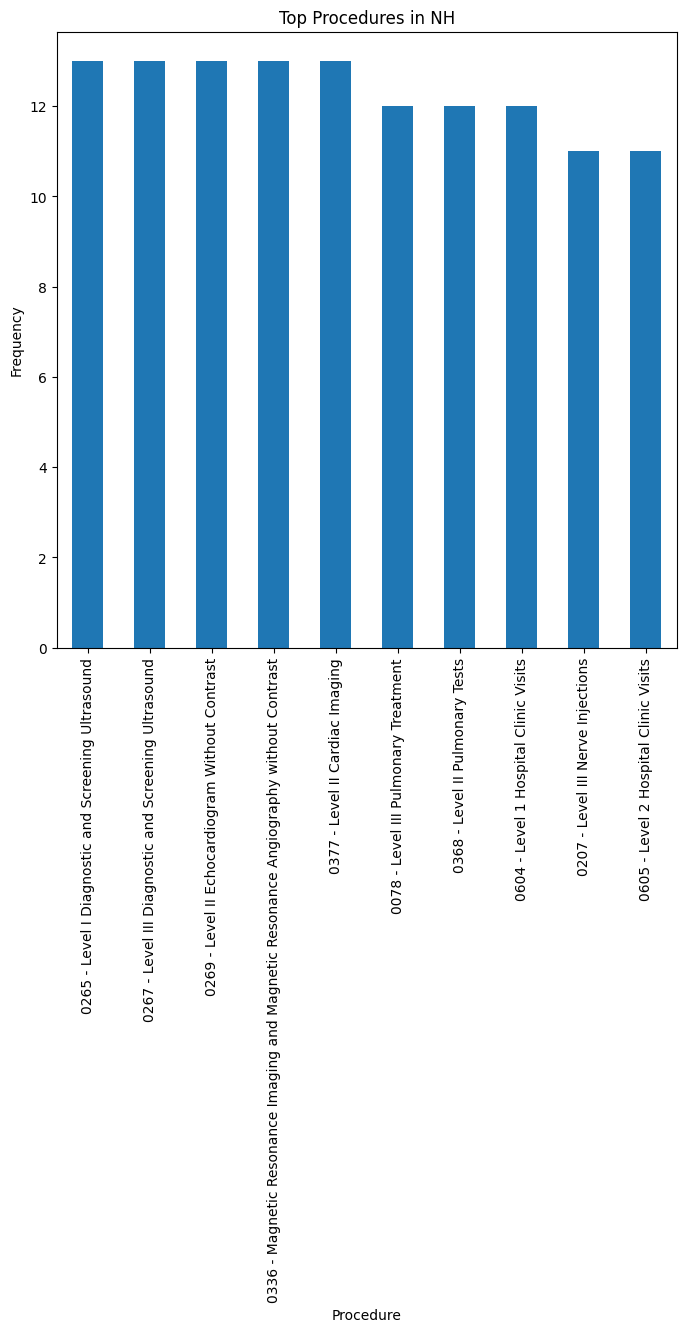

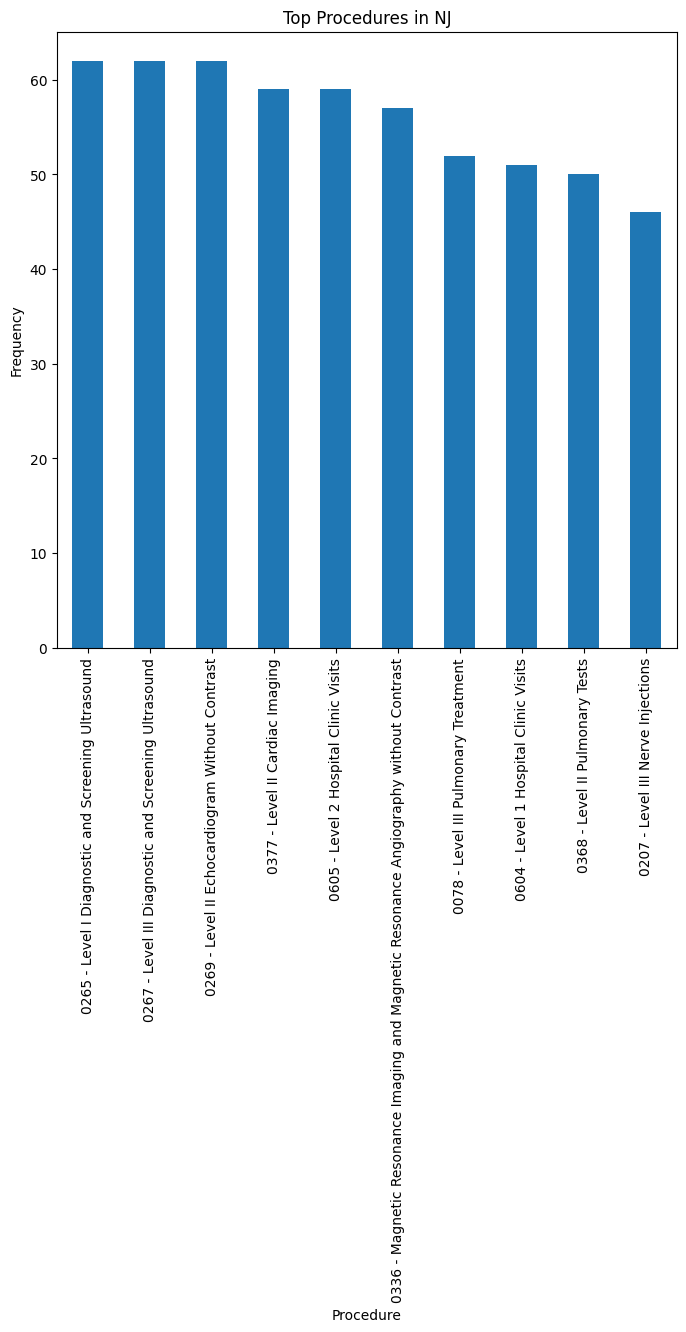

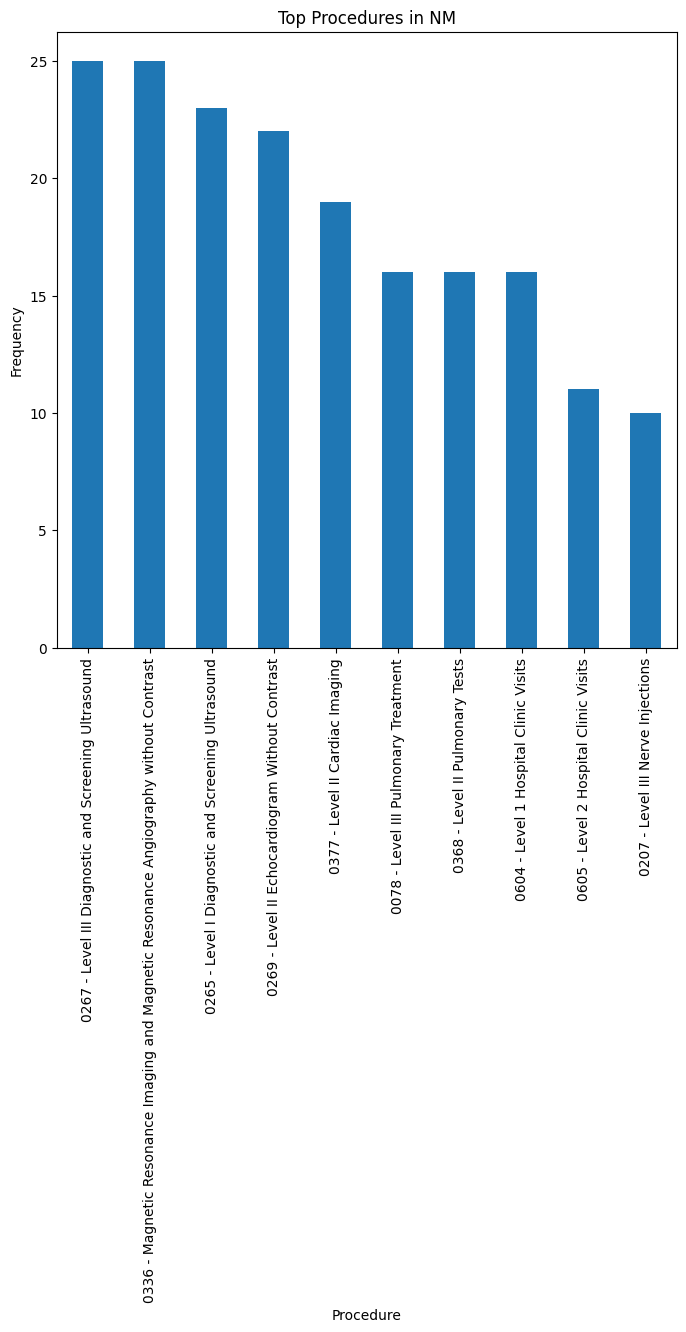

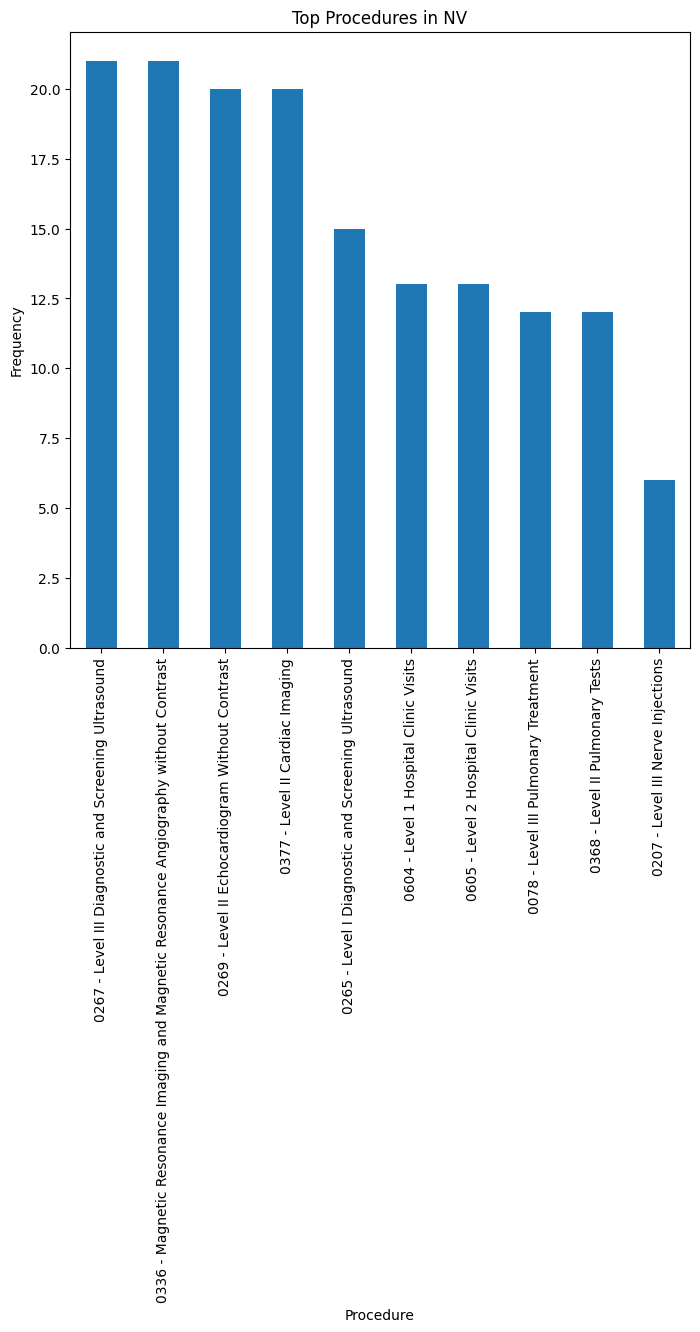

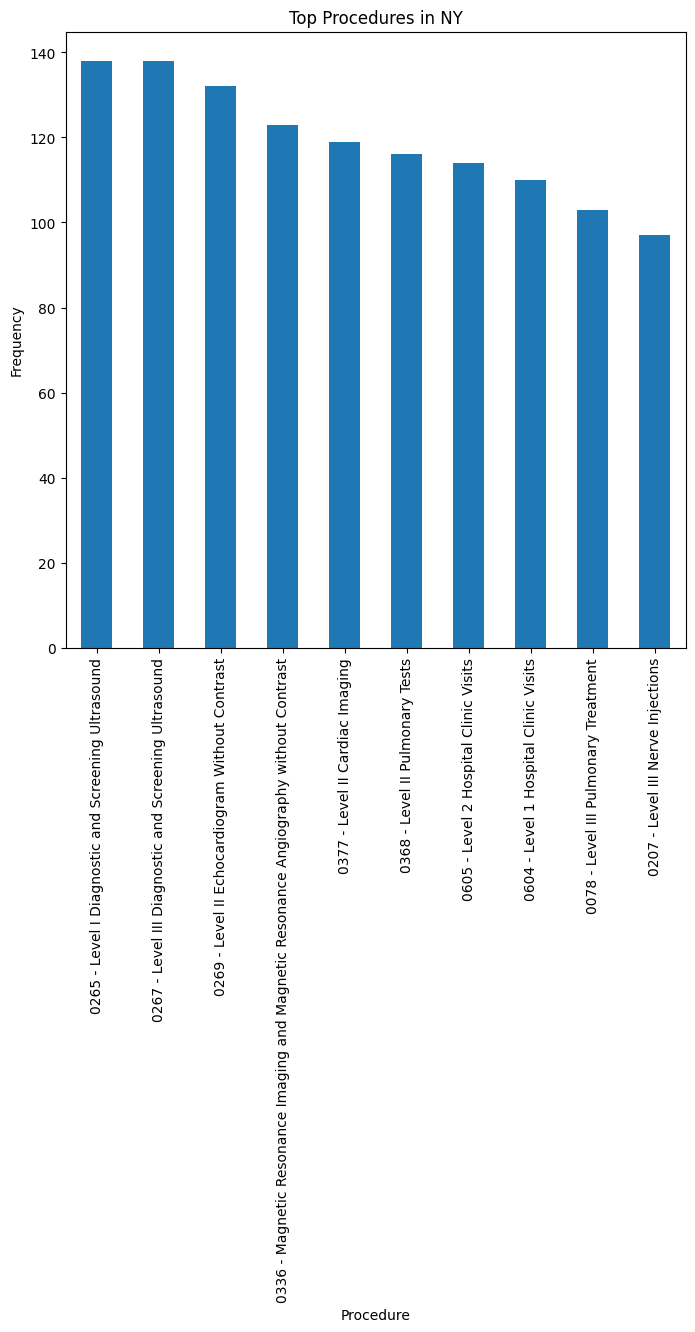

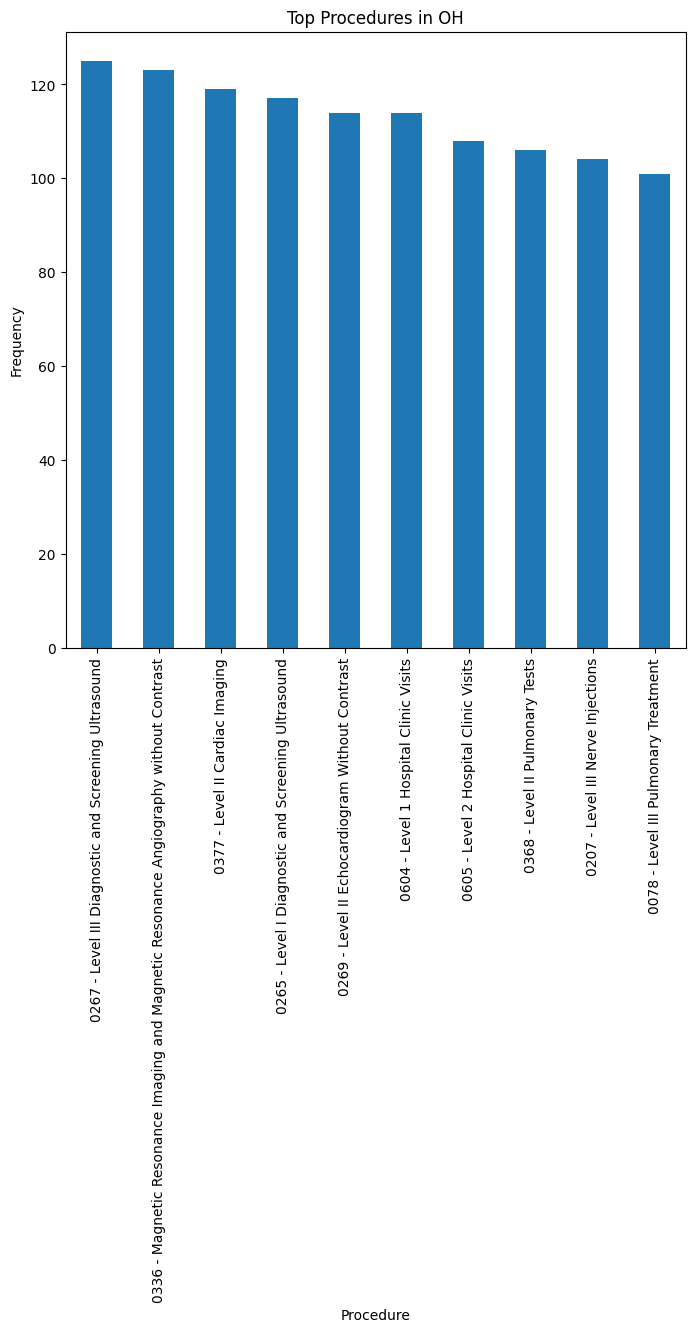

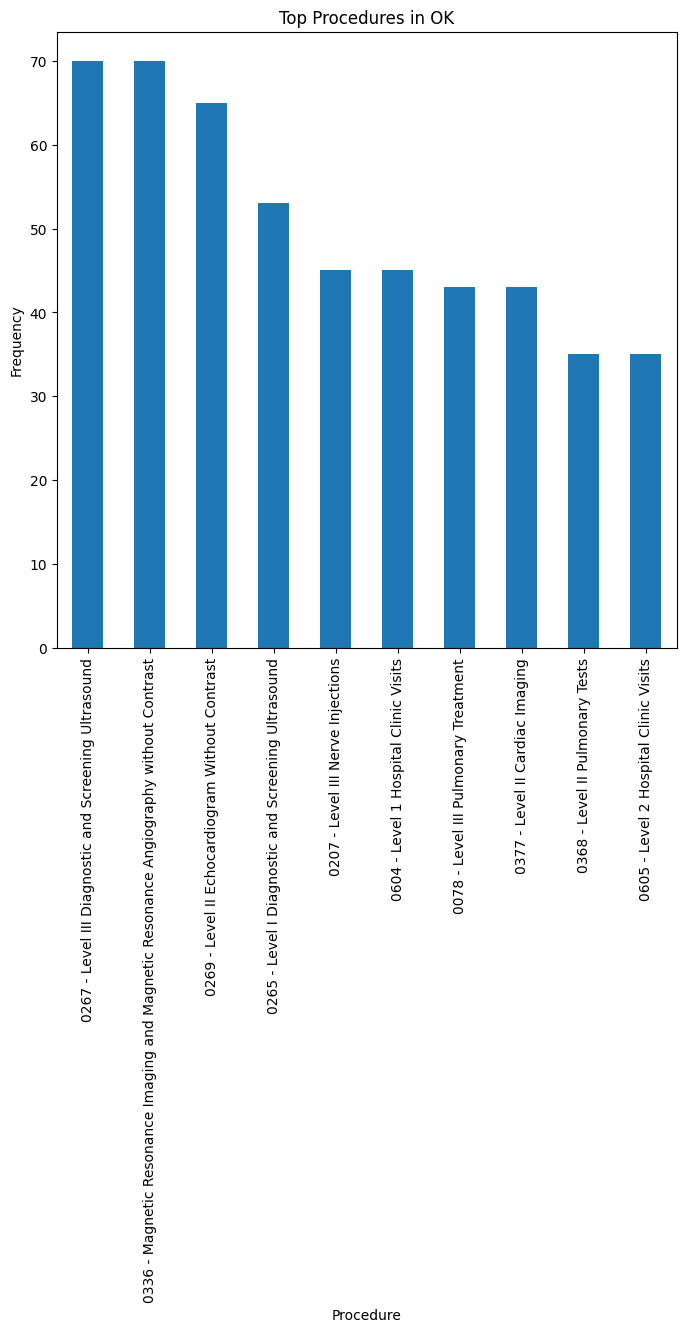

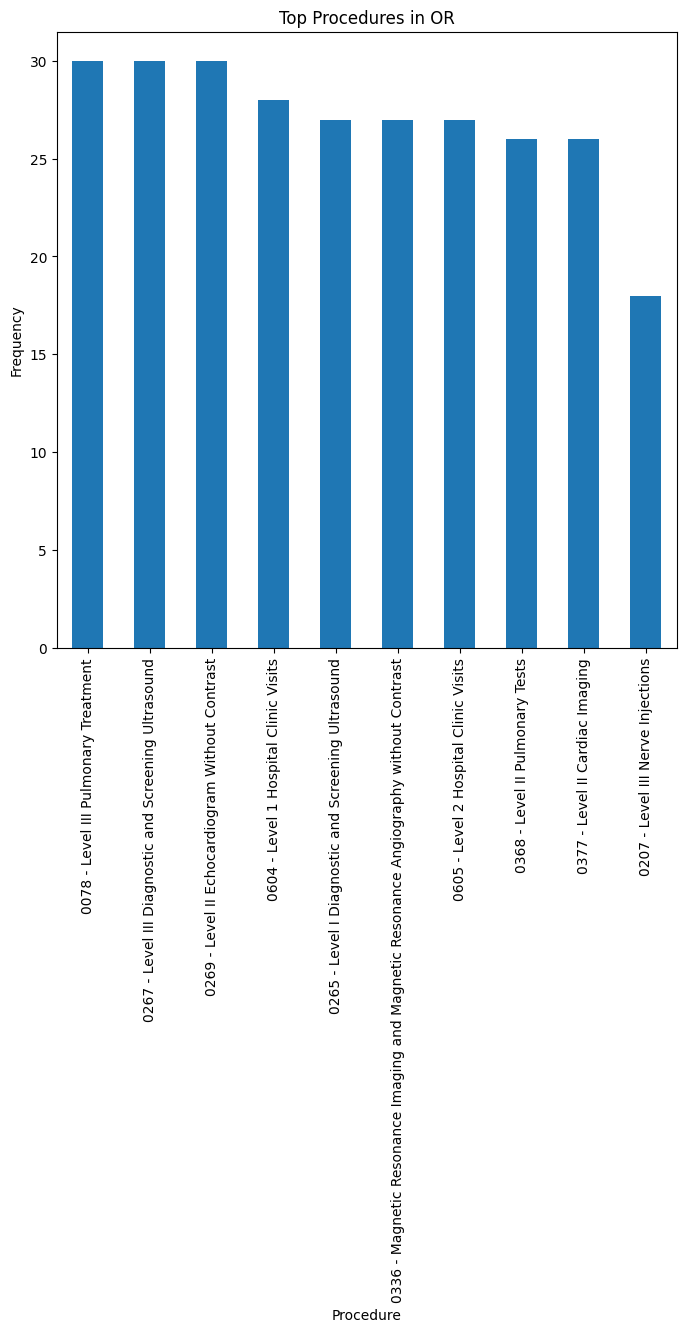

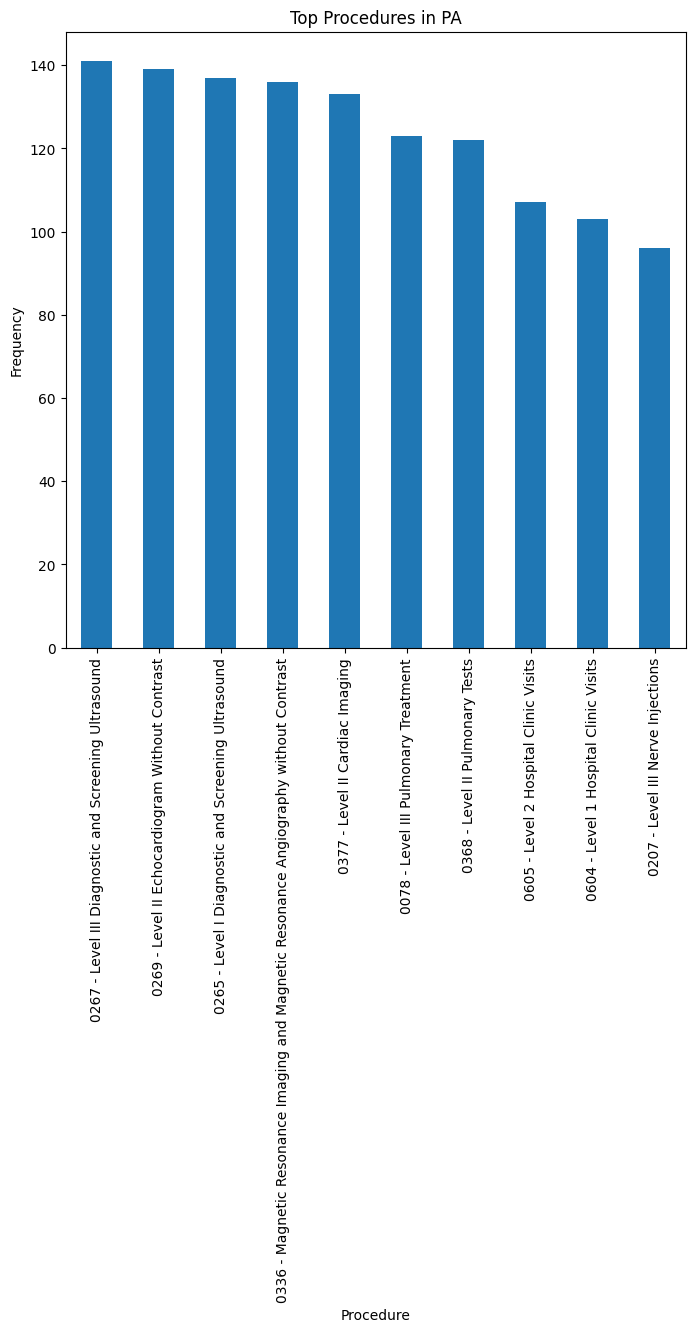

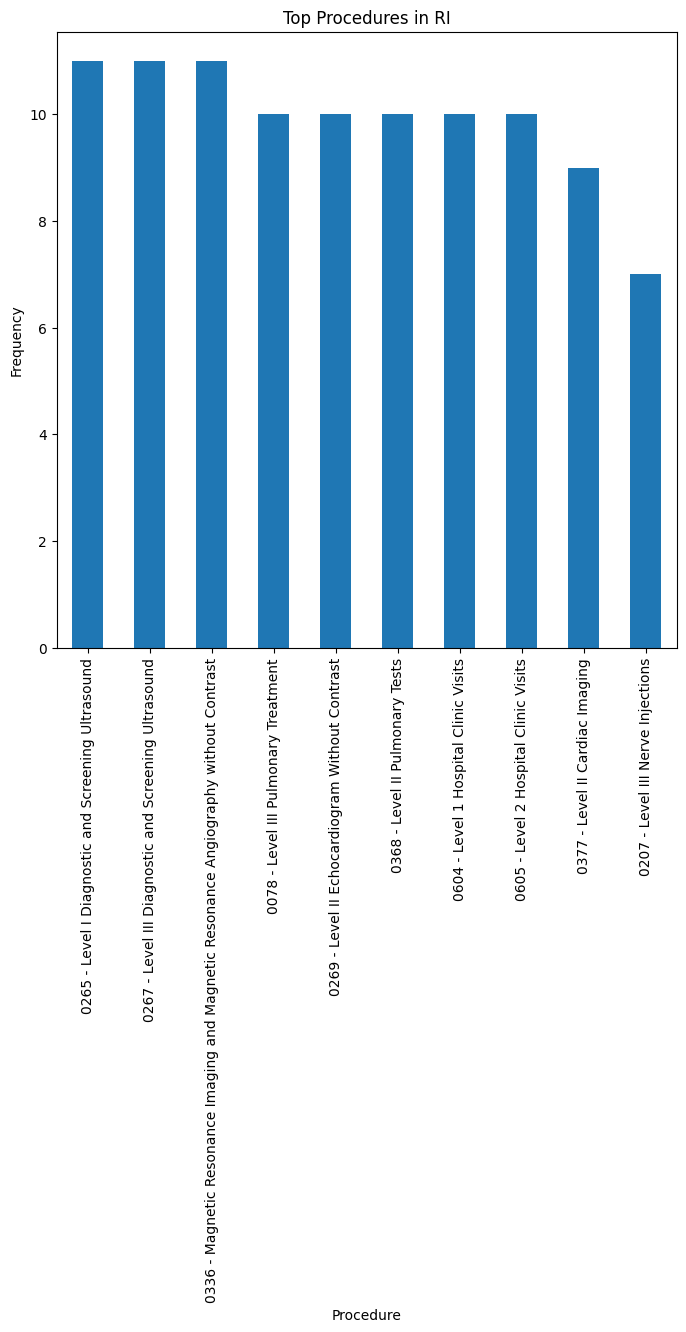

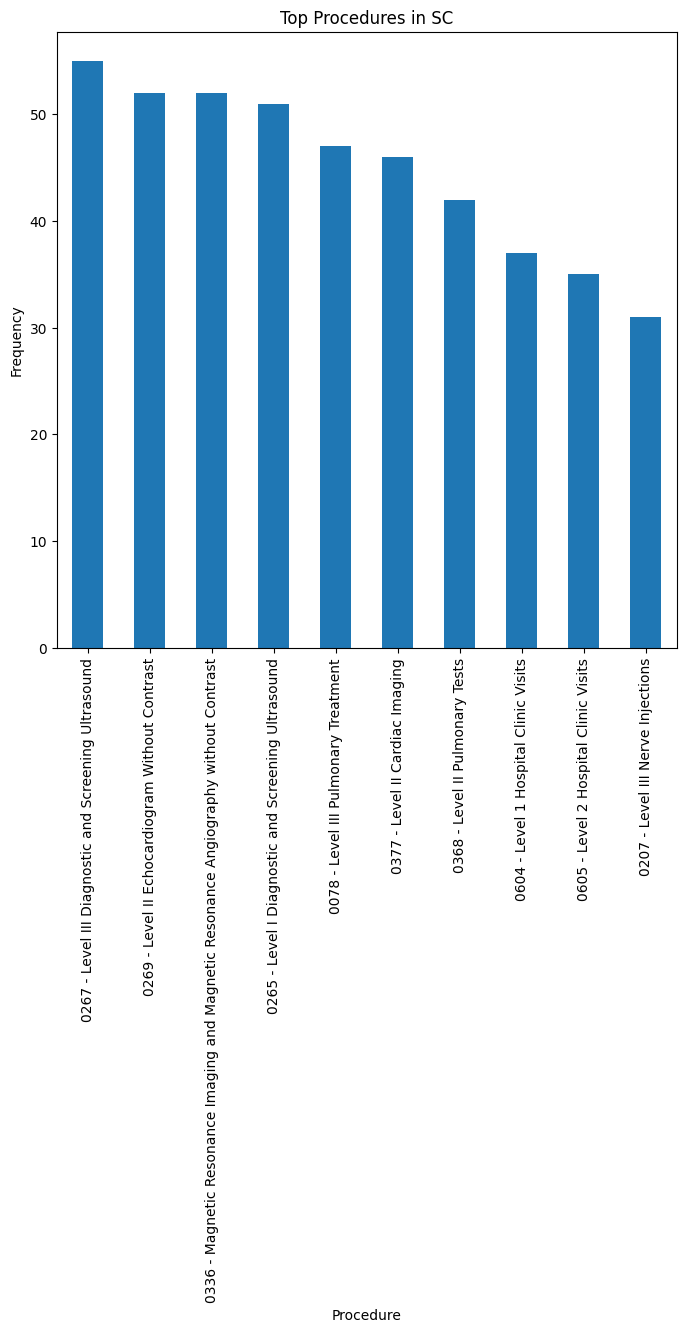

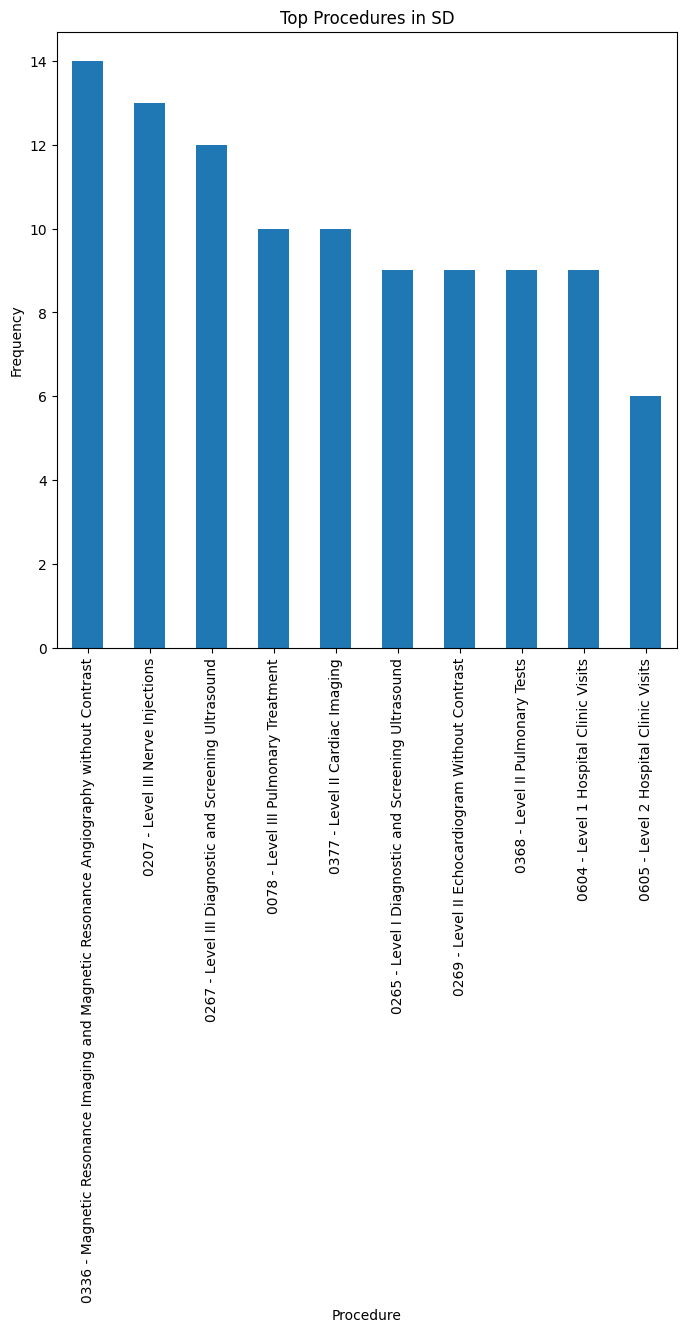

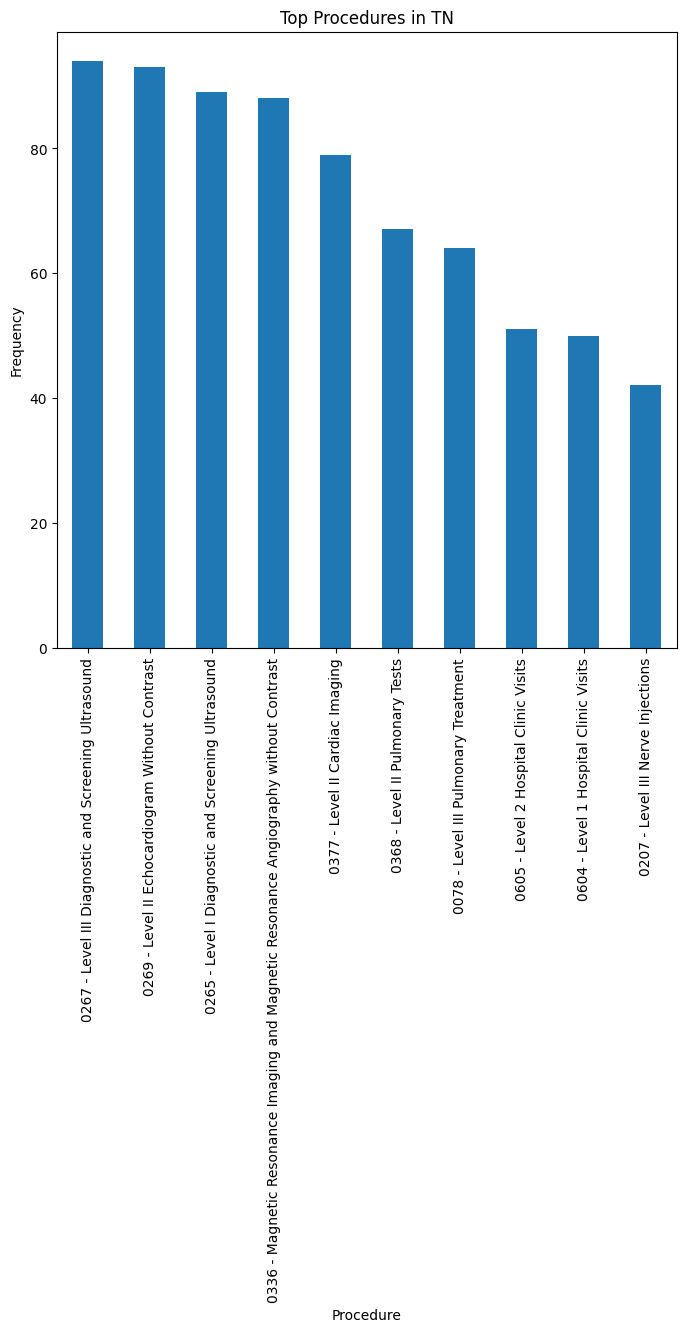

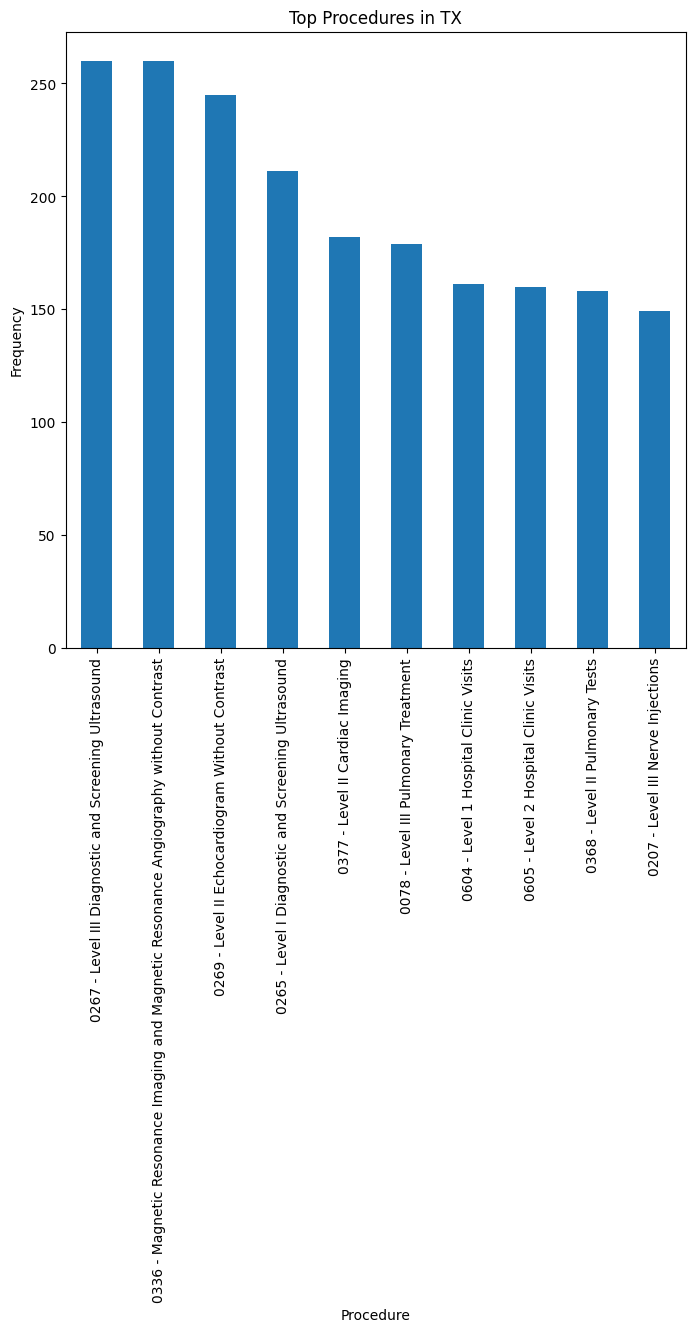

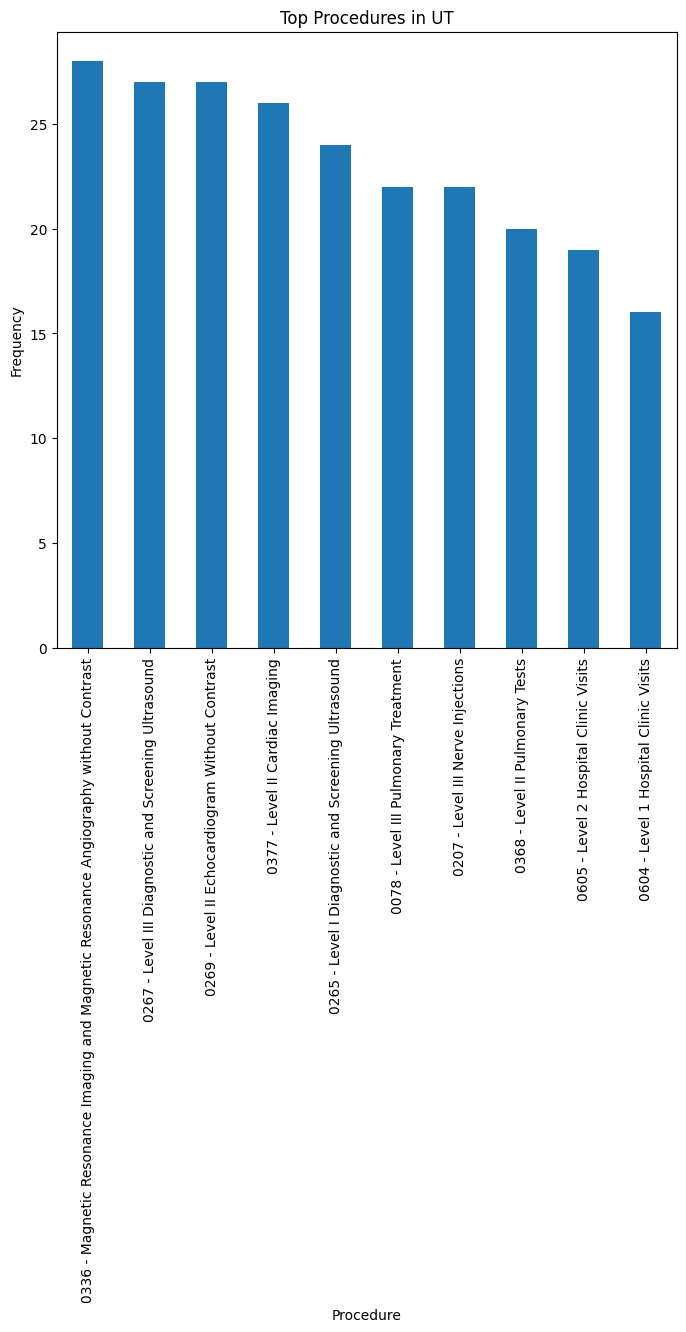

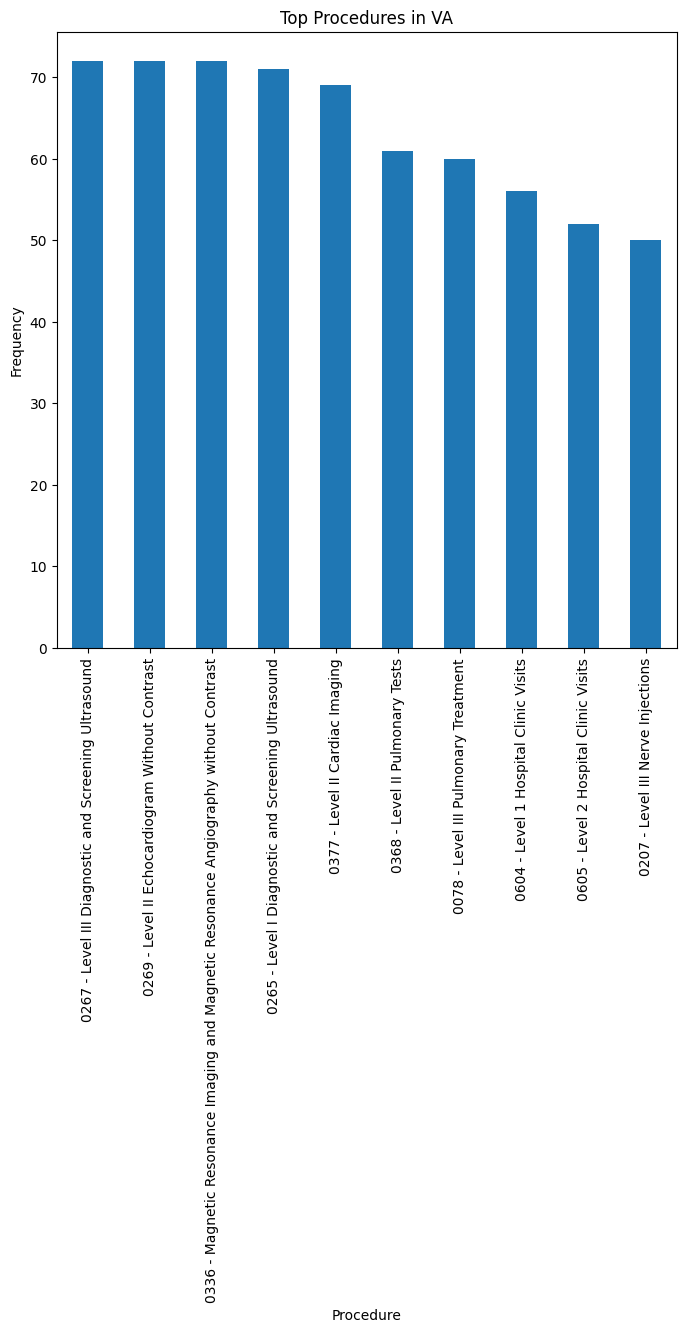

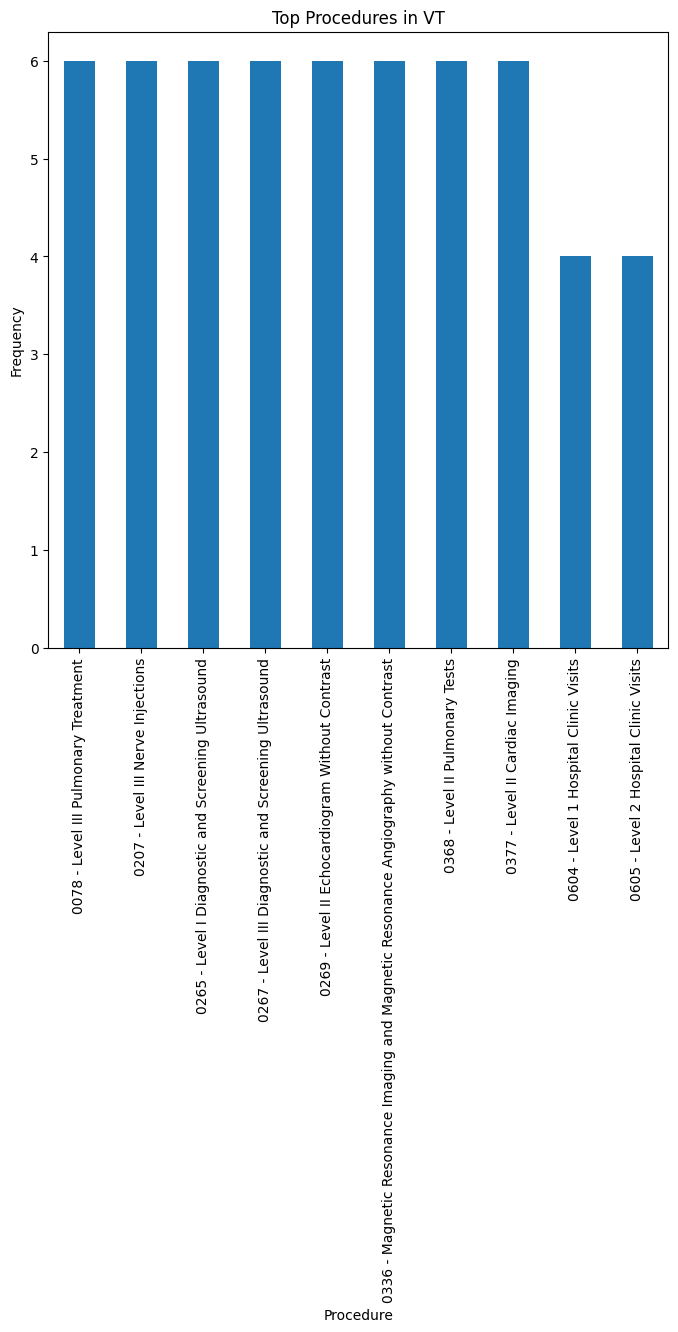

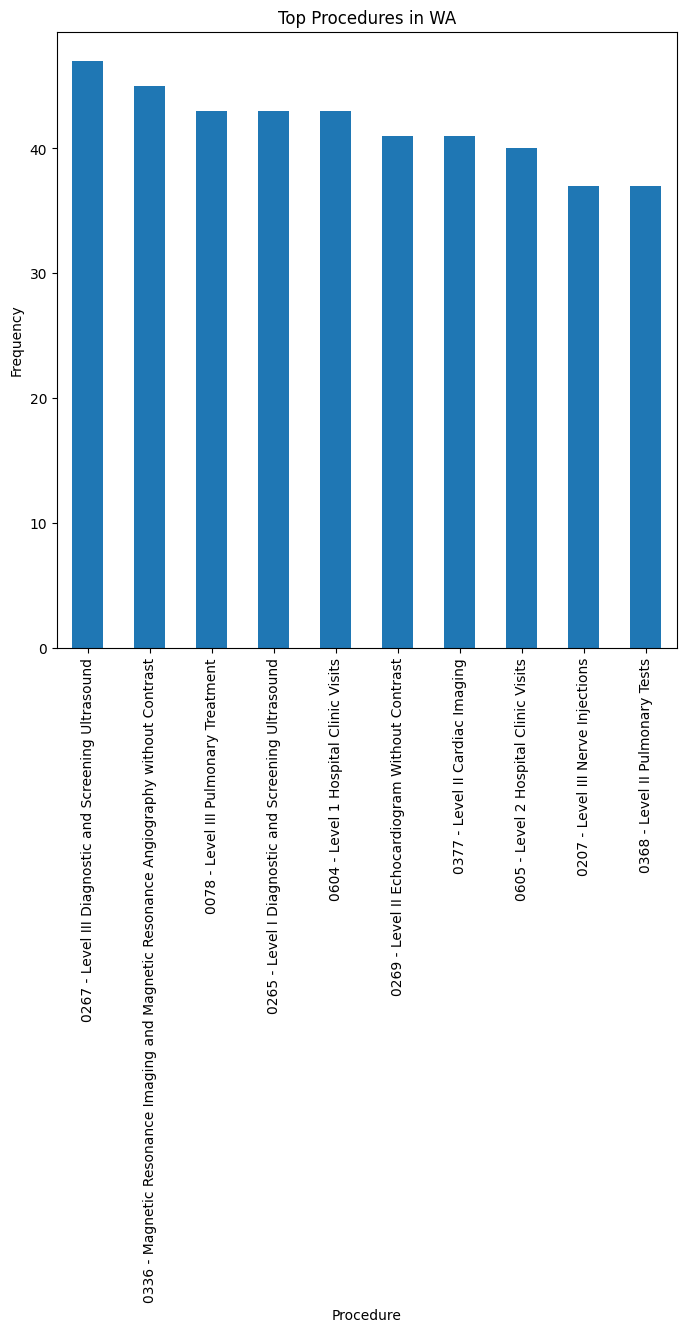

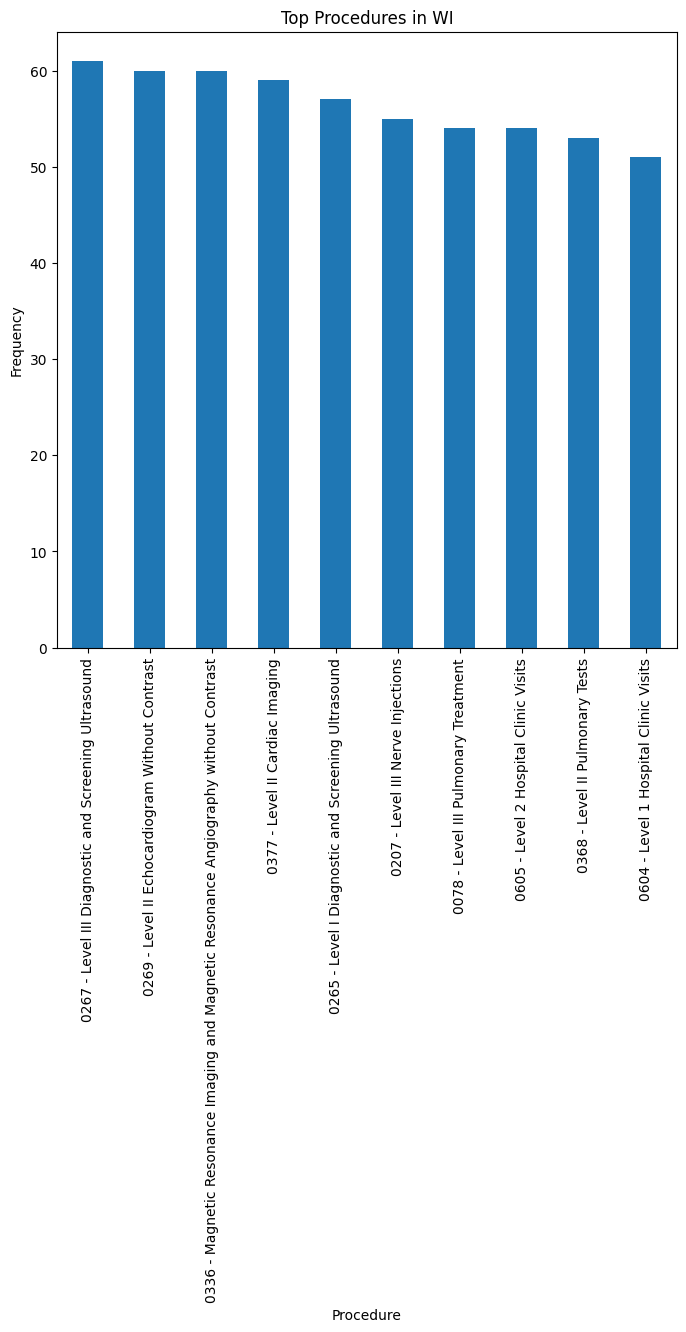

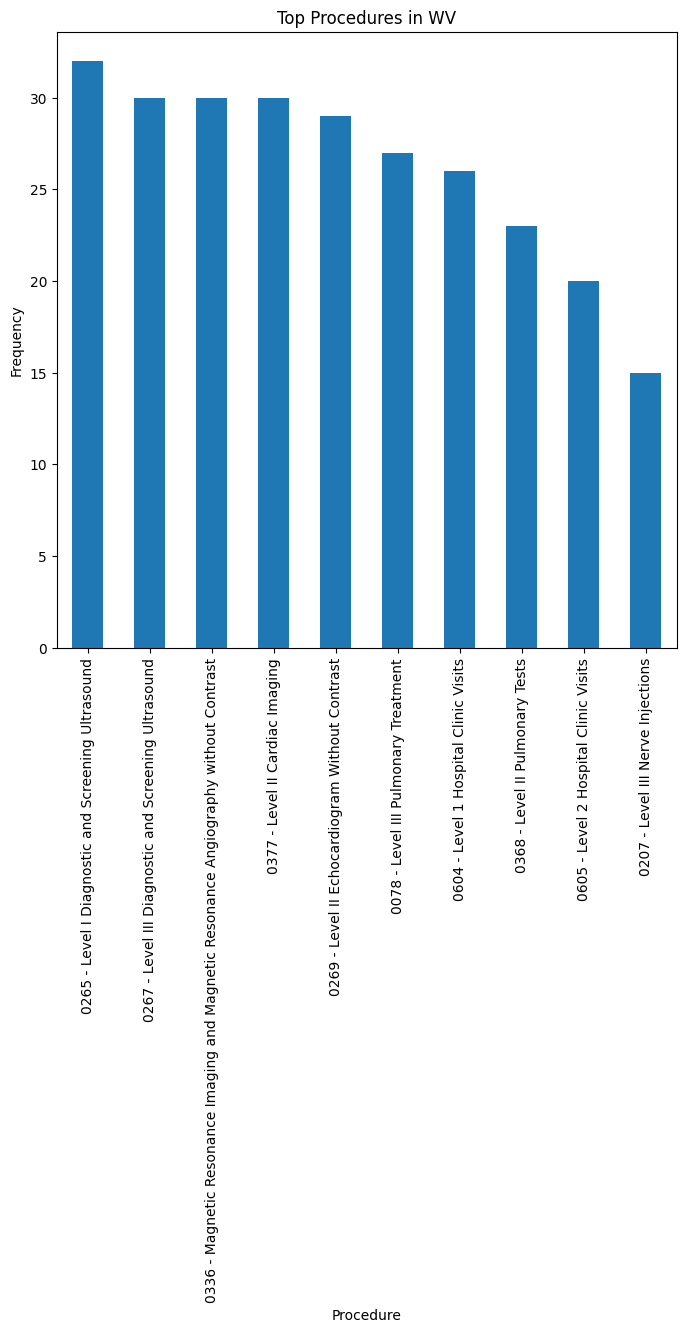

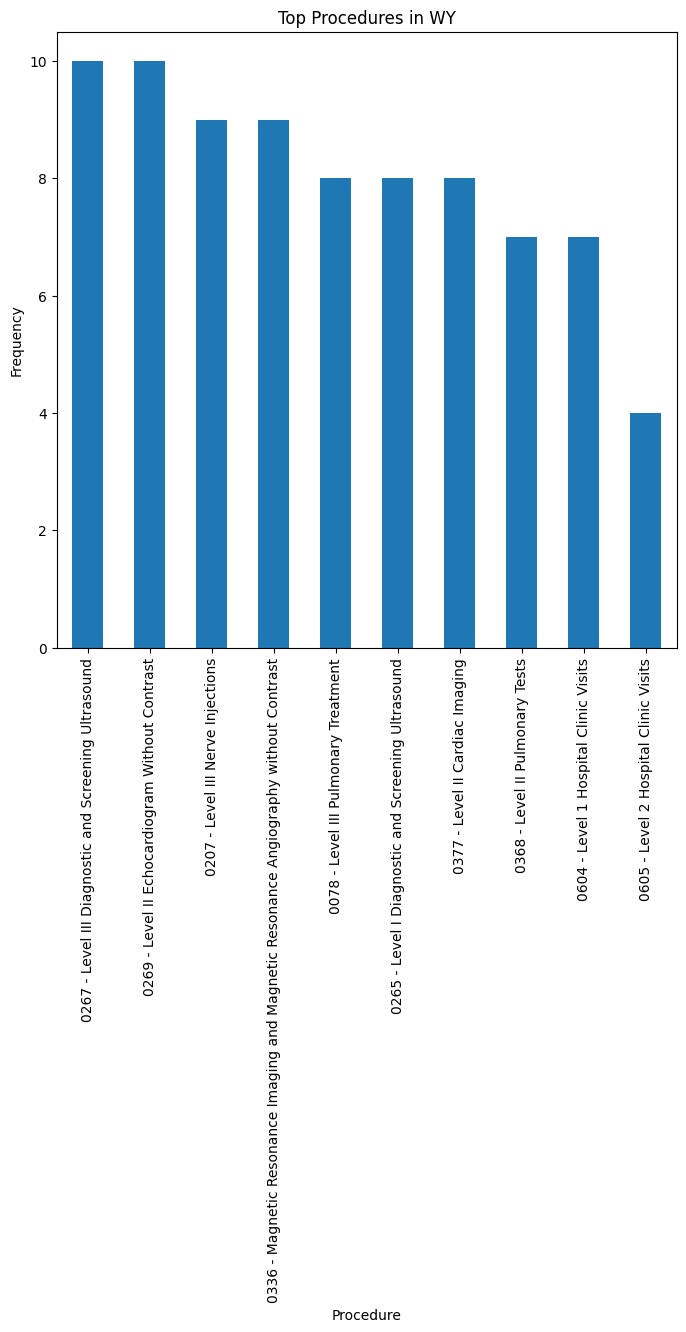

In [ ]:
# Group the oupatient sta by procedure and count frequances
top_procedures = outpatient_data['APC'].value_counts().nlargest(10)

# Convert the top procedures for all states into a list
top_procedures_list = top_procedures.index.tolist()

# Top procedures accross all 10 states
filtered_data = outpatient_data[outpatient_data['APC'].isin(top_procedures_list)]
print ('The top procedures across all the states are: ',top_procedures)
for state, state_data in filtered_data.groupby('Provider State'):
    state_procedures_count = state_data['APC'].value_counts().nlargest(10)
    plt.figure(figsize=(8, 8))
    state_procedures_count.plot(kind='bar')
    plt.title(f'Top Procedures in {state}')
    plt.xlabel('Procedure')
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.show()


We can see from the results above that Level III Diagnostic and Screening Ultrasound, Level II echocardiogram and Magnetic Resonance Imaging are the most used procedures across the USA. The high frequency suggests that these procedures are prevalent in outpatient settings and are frequently billed and provided.

Additionally I plotted the histogram of top procedures in every and each 50 states in USA. We can see that the top 10 procedures are different for each states. It indicates that the Outpatient care procedures in each state releates to the location of state in USA.

***Task 6***

List and compare the top 10 expensive outpatient and inpatient care, are they the same for each state?


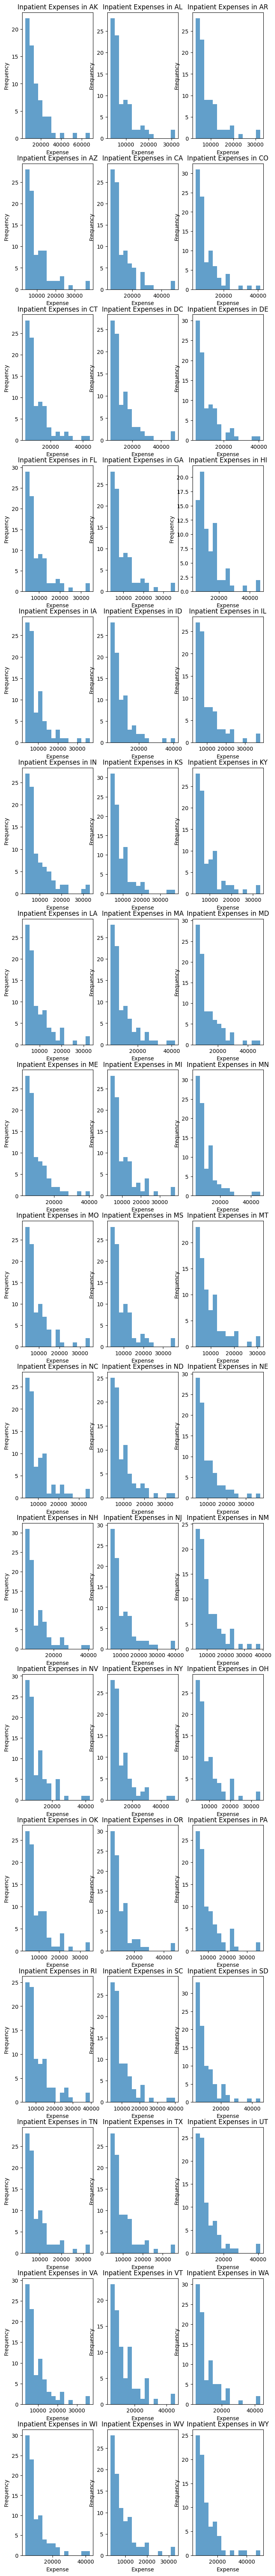

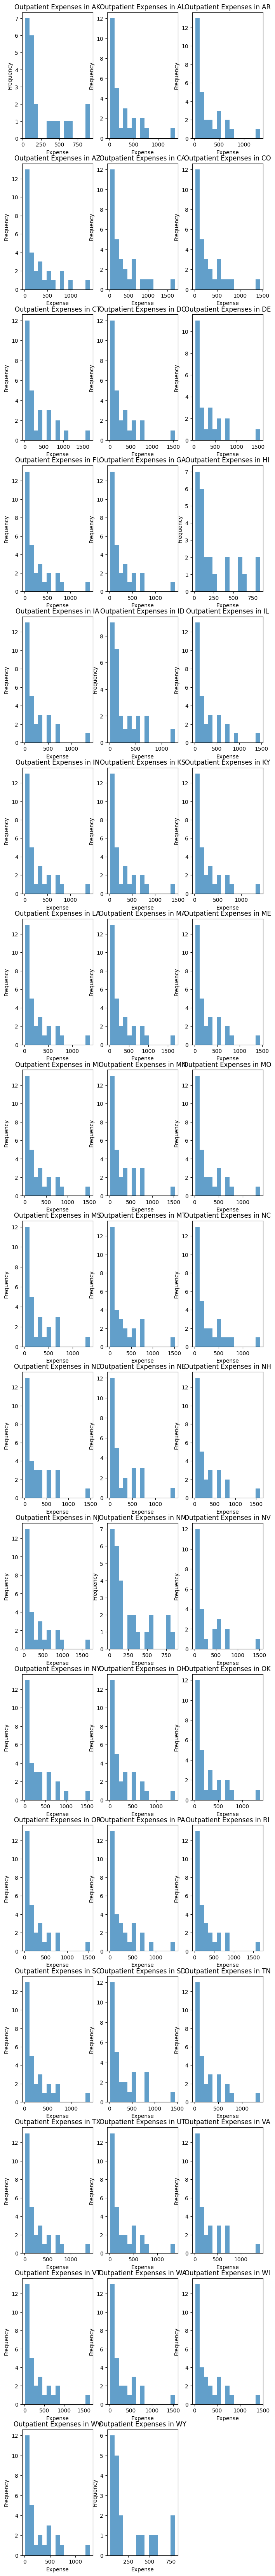

In [ ]:
inpatient_expensive = (inpatient_data.groupby(['Provider State', 'DRG Definition']).agg({'Average Covered Charges': 'mean', 'Average Total Payments': 'mean'}).reset_index())
outpatient_expensive = (outpatient_data.groupby(['Provider State', 'APC']).agg({'Average  Estimated Submitted Charges': 'mean', 'Average Total Payments': 'mean'}).reset_index())
# group and filter the inpatient and outpatient expensive procedures
def get_top_10(df, cost_column): #function to find top procedures in states
    top = (df.groupby('Provider State').apply(lambda x: x.nlargest(10, cost_column)).reset_index(drop=True))
    return top

#top 10 expensive items for inpatient and outpatien
top_10_inpatient = get_top_10(inpatient_expensive, 'Average Total Payments')
top_10_outpatient = get_top_10(outpatient_expensive, 'Average Total Payments')

# write in list the top-10 expensive inpatient and outpatient procedures
for state in inpatient_expensive['Provider State'].unique():
    inpatient_state_top = top_10_inpatient[top_10_inpatient['Provider State'] == state]['DRG Definition'].tolist()
    outpatient_state_top = top_10_outpatient[top_10_outpatient['Provider State'] == state]['APC'].tolist()

def plot_histograms(data, column, care):
    unique_states = data['Provider State'].unique()
    num_states = len(unique_states)
    num_plots_per_row = 3
    num_rows = (num_states - 1) // num_plots_per_row + 1
    plt.figure(figsize=(8, 5 * num_rows))
    for i, state in enumerate(unique_states, 1):
        plt.subplot(num_rows, num_plots_per_row, i)
        state_data = data[data['Provider State'] == state][column]
        plt.hist(state_data, bins=15, alpha=0.7)
        plt.title(f'{care} Expenses in {state}')
        plt.xlabel('Expense')
        plt.ylabel('Frequency')
    plt.show()
#plot histograms for inpatient and outpatient
plot_histograms(inpatient_expensive, 'Average Total Payments', 'Inpatient')
plot_histograms(outpatient_expensive, 'Average Total Payments', 'Outpatient')


<ipython-input-8-f898af903daa>:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_top_10_inpatient = top_10_inpatient.groupby('DRG Definition').mean().nlargest(10, 'Average Total Payments').reset_index()


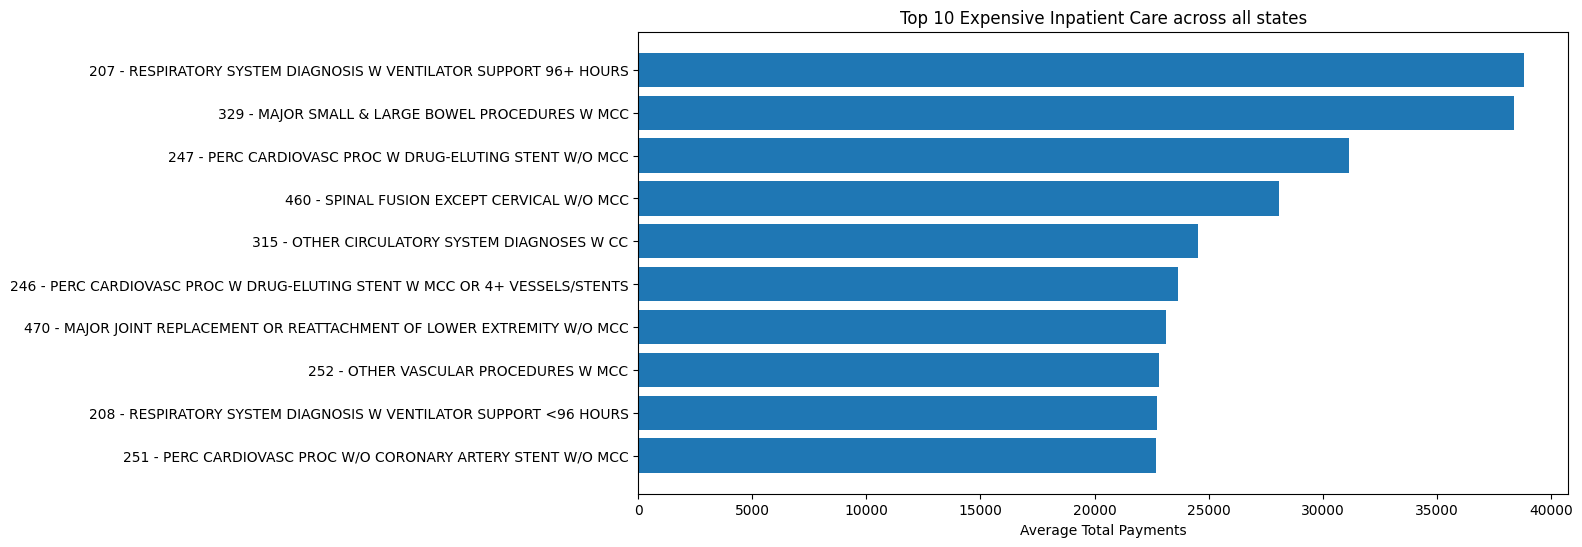

<ipython-input-8-f898af903daa>:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  overall_top_10_outpatient = top_10_outpatient.groupby('APC').mean().nlargest(10, 'Average Total Payments').reset_index()


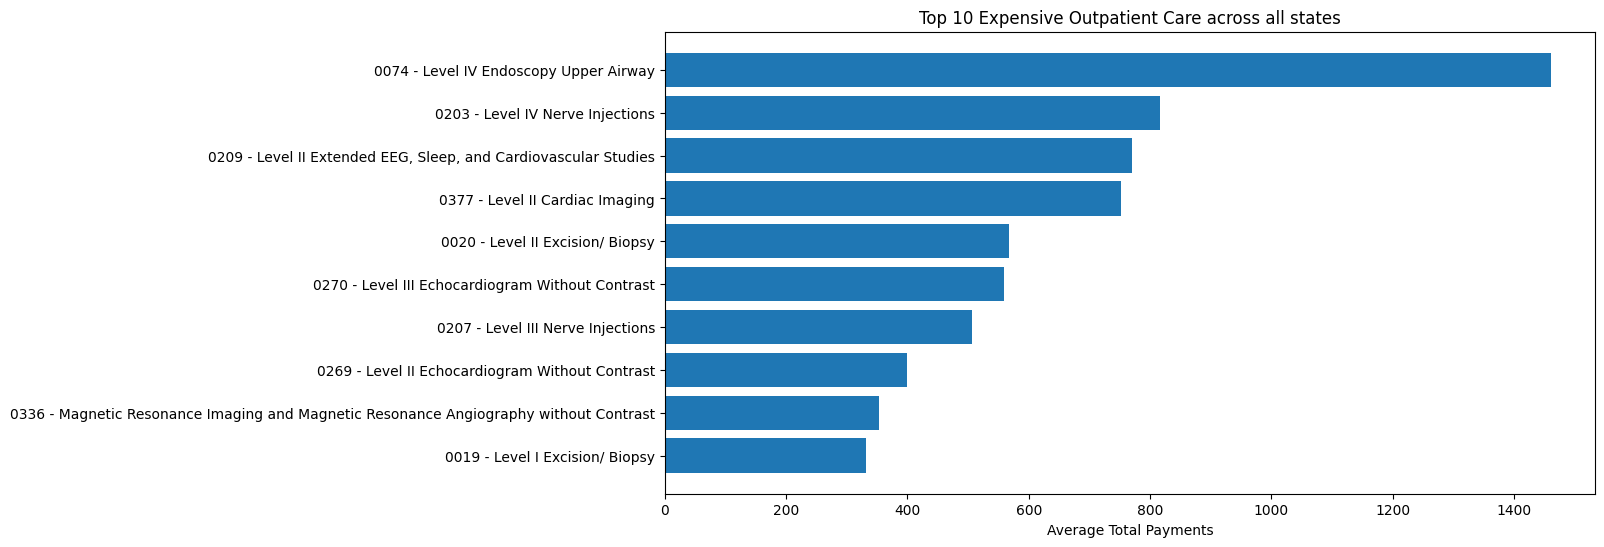

In [ ]:
# Now lets find the top 10 expensive acroos all states
def plot_top_10(data, title):
    plt.figure(figsize=(12, 6))
    x = data['DRG Definition' if 'DRG Definition' in data.columns else 'APC']
    y = data['Average Total Payments' if 'Average Total Payments' in data.columns else 'Average Total Payments']
    plt.barh(x, y)
    plt.xlabel('Average Total Payments' if 'Average Total Payments' in data.columns else 'Average Total Payments')
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

# Get top 10 expensive inpatient and oupatient
overall_top_10_inpatient = top_10_inpatient.groupby('DRG Definition').mean().nlargest(10, 'Average Total Payments').reset_index()
plot_top_10(overall_top_10_inpatient, 'Top 10 Expensive Inpatient Care across all states')
overall_top_10_outpatient = top_10_outpatient.groupby('APC').mean().nlargest(10, 'Average Total Payments').reset_index()
plot_top_10(overall_top_10_outpatient, 'Top 10 Expensive Outpatient Care across all states')


We can see from the below plot that top 10 expensive procedures frrom all states are different for Inpatient and Outpatient care. The histograms with top expensive procedures are shown above for Inpatient and Outapient care.

***Task 7***

Which provider has the lowest inpatient or outpatient care cost overall in the country or in each state?

In [ ]:
# Grouping by Provider ID to find the average expenses across all providers
provider_outpatient_all = outpatient_data.groupby('Provider Id').agg({'Average Total Payments': 'mean'}).reset_index()

# Finding the provider with the lowest outpatient care cost overall
lowest_cost_provider_outpatient = provider_outpatient_all.nsmallest(1, 'Average Total Payments')
print(lowest_cost_provider_outpatient)



     Provider Id  Average Total Payments
305      50257.0                  47.818


The lowest provider ID for oupatient provider is 50257. The total average payments for this provider is 48 dollars.

In [ ]:
# Grouping by Provider ID and State to find the average expenses for each provider in each state
provider_outpatient_state = outpatient_data.groupby(['Provider State', 'Provider Id']).agg({'Average Total Payments': 'mean'}).reset_index()

# Finding the provider with the lowest outpatient care cost in each state
lowest_cost_provider_outpatient_state = (
    provider_outpatient_state.loc[provider_outpatient_state.groupby('Provider State')['Average Total Payments'].idxmin()])
print(lowest_cost_provider_outpatient_state)


     Provider State  Provider Id  Average Total Payments
3                AK      20012.0              310.810676
61               AL      10095.0              120.782500
125              AR      40072.0              155.223503
192              AZ      30122.0              193.259633
305              CA      50257.0               47.818000
458              CO      60011.0              229.788905
524              CT      70039.0              156.764813
530              DC      90008.0              234.277715
535              DE      80007.0              278.136176
660              FL     100239.0              164.021997
761              GA     110113.0              160.134000
805              HI     120004.0              275.690904
827              IA     160040.0              210.218698
861              ID     130065.0              231.550031
881              IL     140046.0              220.247478
1018             IN     150047.0              217.136561
1124             KS     170198.

For each state I found the lowest oupatient care provider. The table is shown above. This information will be useful for people who want to find lower provider for outpatient.

In [ ]:
# Grouping by Provider ID to find the average expenses across all providers
provider_inpatient_all = inpatient_data.groupby('Provider Id').agg({'Average Total Payments': 'mean'}).reset_index()

# Finding the provider with the lowest inpatient care cost overall
lowest_cost_provider_inpatient = provider_inpatient_all.nsmallest(1, 'Average Total Payments')
print(lowest_cost_provider_inpatient)


      Provider Id  Average Total Payments
2100       360130                  3792.0


The lowest provider ID for inpatient provider is 360130. The total average payments for this provider is 3792 dollars.

In [ ]:
# Grouping by Provider ID and State to find the average expenses for each provider in each state
provider_inpatient_state = inpatient_data.groupby(['Provider State', 'Provider Id']).agg({'Average Total Payments': 'mean'}).reset_index()

# Finding the provider with the lowest inpatient care cost in each state
lowest_cost_provider_inpatient_state = (provider_inpatient_state.loc[provider_inpatient_state.groupby('Provider State')['Average Total Payments'].idxmin()])
print(lowest_cost_provider_inpatient_state)


     Provider State  Provider Id  Average Total Payments
5                AK        20018            10046.580127
71               AL        10110             4005.235294
107              AR        40019             5156.230769
186              AZ        30120             5380.980702
295              CA        50234             4433.714286
479              CO        60071             5788.299242
512              CT        70029             6995.324920
523              DC        90005             7144.048358
529              DE        80004             7363.440649
615              FL       100139             4225.000000
788              GA       110194             4425.000000
805              HI       120007            10279.351643
822              IA       160032             5337.529365
848              ID       130007             6875.981737
939              IL       140184             5628.759637
1009             IN       150045             4495.923077
1079             KS       17007

For each state I found the lowest inpatient care provider. The table is shown above. This information will be useful for people who want to find lower provider for inpatient care.

***Conclusions***

This project's analysis sheds light on the aspects between inpatient and outpatient care services across different states.

- Average cost of Inpatient procedures highet in 50 times that outpatient care in each state.
- The lowest oupatient average cost is in Mississipi (238 dollars), the highest oupatient average cost is in New Jersey (316 dollars). The highest inpatient average cost is in Alaska state (15274 dollars), the lowest inpatient average cost in Alabama (8228 dollars).
- The number of services for Inpatient care is less than for Outpatient care for each state (smoothly decrease from 0.18 up to 0.02)
- The top procedures across all the states are: Level III Diagnostic and Screening Ultrasound,  Level II Echocardiogram Without Contrast,  Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast   
- The lowest provider ID for oupatient provider is 50257. The total average payments for this provider is 48 dollars.
The lowest provider ID for inpatient provider is 360130. The total average payments for this provider is 3792 dollars.